<a href="https://colab.research.google.com/github/Nyakiamo-Samuel/CAR-WASH/blob/main/Car_Wash_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
aug=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Excel/August1.csv')
aug

,DATE,CAR IDENTIFICATION,SERVICE,AMOUNT,CODE,NOT PAID,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,Unnamed: 9
0,09/08/2024,KCY 688Y COLT,WASH AND VACUUM,600,MPESA,PAID,NaN,NaN,NaN,NaN
1,09/08/2024,KAY 419 FORRESTER,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
2,09/08/2024,KCH 178G LEXUS,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
3,09/08/2024,KDL 274X ISUZU,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
4,09/08/2024,KBA 128G BENZ,WASH AND VACUUM,400,CASH,PAID,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
119,31/08/2031,KDB 647W PRADO,NORMAL WASH,400,MPESA,PAID,NaN,NaN,NaN,NaN
120,31/08/2032,KCW 996F HONDA,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
121,31/08/2033,KCD 088P HARRIER,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
122,31/08/2034,KDQ 604R DEMIO,NORMAL WASH,500,MPESA,PAID,NaN,NaN,NaN,NaN


In [ ]:
aug.shape

(124, 10)

In [ ]:
aug.columns

Index(['DATE', 'CAR IDENTIFICATION', 'SERVICE', 'AMOUNT', 'CODE', 'NOT PAID',
       'BALANCE', 'ADDITIONAL SERVICE', 'RESPONSIBILITY', 'Unnamed: 9'],
      dtype='object')

In [ ]:
aug.rename(columns={'NOT PAID':'STATUS'}, inplace=True)

In [ ]:
aug.drop('Unnamed: 9', axis=1, inplace=True)

In [ ]:
aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DATE                124 non-null    object
 1   CAR IDENTIFICATION  124 non-null    object
 2   SERVICE             122 non-null    object
 3   AMOUNT              121 non-null    object
 4   CODE                113 non-null    object
 5   STATUS              123 non-null    object
 6   BALANCE             6 non-null      object
 7   ADDITIONAL SERVICE  8 non-null      object
 8   RESPONSIBILITY      17 non-null     object
dtypes: object(9)
memory usage: 8.8+ KB


In [ ]:
sept=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Excel/September1.csv')
sept

,DATE,CAR IDENTIFICATION,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL,Unnamed: 10,Unnamed: 11
0,02/09/2024,KCH 344D MERCEDES,WASH AND VACUUM,600,MPESA,PAID,NaN,NaN,NaN,NaN,NaN,NaN
1,02/09/2024,GKA 955R MERCEDES,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,NaN,NaN
2,02/09/2024,KCV 989S MERCEDES,NORMAL WASH,300,MPESA,PAID,NaN,NaN,SERVICE INCLUSIVE,NaN,NaN,NaN
3,02/09/2024,KCY 688F COLT,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,NaN,NaN
4,02/09/2024,KCR 330Z COLT,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
181,30/09/2024,KDP 911E BENZ,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,NaN,NaN
182,30/09/2024,KBZ 052W NISSAN PATROL,NORMAL WASH,4000,MPESA,PAID,NaN,NaN,NaN,NaN,NaN,NaN
183,30/09/2024,KDE 980V GOLF,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,NaN,NaN
184,30/09/2024,KUU 111 R.R,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sept.shape

(186, 12)

In [ ]:
sept.columns

Index(['DATE', 'CAR IDENTIFICATION', 'SERVICE', 'AMOUNT', 'CODE', 'STATUS',
       'BALANCE', 'ADDITIONAL SERVICE', 'RESPONSIBILITY', 'NORMAL',
       'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [ ]:
sept.drop(['Unnamed: 10', 'Unnamed: 11'], axis=1, inplace=True)

In [ ]:
sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DATE                186 non-null    object
 1   CAR IDENTIFICATION  186 non-null    object
 2   SERVICE             185 non-null    object
 3   AMOUNT              161 non-null    object
 4   CODE                138 non-null    object
 5   STATUS              182 non-null    object
 6   BALANCE             26 non-null     object
 7   ADDITIONAL SERVICE  3 non-null      object
 8   RESPONSIBILITY      47 non-null     object
 9   NORMAL              10 non-null     object
dtypes: object(10)
memory usage: 14.7+ KB


In [ ]:
oct=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Excel/October1.csv")
oct

,DATE,CAR IDENTIFICATION,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,Normal
0,10/01/2024,KDP 330S MERCEDES,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
1,10/01/2024,KAX 577J COROLLA,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
2,10/01/2024,KCR 330Z COLTT,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
3,10/01/2024,CARPET,NORMAL WASH,"2,700.00",CASH,PAID,NaN,NaN,NaN,ANTHONY RECEIVED CASH
4,10/01/2024,KDP 911E MERCEDES,NORMAL WASH,300,MPESA,PAID,NaN,NaN,SERVICE INCLUSIVE,NaN
...,...,...,...,...,...,...,...,...,...,...
190,10/31/2024,KBS 154M TOYOTA,NORMAL WASH,300,NaN,PAID,NaN,NaN,STEVE,NaN
191,10/31/2024,KDP 574D FORRESTER,NORMAL WASH,300,MPESA,PAID,NaN,NaN,STEVE,NaN
192,10/31/2024,KBS 149M IST,NORMAL WASH,300,NaN,PAID,NaN,NaN,STEVE,NaN
193,10/31/2024,KAU 240J IMPREZZA(GS8),ENGINE WATER WASH,300,NaN,UNPAID,NaN,NaN,MUTUA,NaN


In [ ]:
oct.shape

(195, 10)

In [ ]:
oct.columns

Index(['DATE', 'CAR IDENTIFICATION', 'SERVICE', 'AMOUNT', 'CODE', 'STATUS',
       'BALANCE', 'ADDITIONAL SERVICE', 'RESPONSIBILITY', 'Normal'],
      dtype='object')

In [ ]:
oct.rename(columns={'Normal':'NORMAL'}, inplace=True)

In [ ]:
oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DATE                195 non-null    object
 1   CAR IDENTIFICATION  195 non-null    object
 2   SERVICE             194 non-null    object
 3   AMOUNT              155 non-null    object
 4   CODE                146 non-null    object
 5   STATUS              195 non-null    object
 6   BALANCE             42 non-null     object
 7   ADDITIONAL SERVICE  9 non-null      object
 8   RESPONSIBILITY      111 non-null    object
 9   NORMAL              9 non-null      object
dtypes: object(10)
memory usage: 15.4+ KB


In [ ]:
nov=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Excel/November1.csv")
nov

,DATE,CAR IDENTIFICATION,Unnamed: 2,AMOUNT,CODE,STATUS,BALANCE,RESPONSIBILITY,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,01/11/2024,KDB 647W PRADO,NORMAL WASH,300.00,MPESA,PAID,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/11/2024,KCR 330Z COLT SK21D4ZU6X,NORMAL WASH,300.00,MPESA,PAID,NaN,MUTUA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02/11/2024,KCR 006K PRADO,NORMAL WASH,300.00,NaN,UNPAID,NaN,STEVE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02/11/2024,KDR 709N SIENTA,NORMAL WASH,300.00,MPESA,PAID,NaN,STEVE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02/11/2024,KDP 572M LANDCRUISER,NORMAL WASH,300.00,NaN,UNPAID,NaN,STEVE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nov.shape

(980, 24)

In [ ]:
nov.columns

Index(['DATE', 'CAR IDENTIFICATION', 'Unnamed: 2', 'AMOUNT', 'CODE', 'STATUS',
       'BALANCE', 'RESPONSIBILITY', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [ ]:
nov.rename(columns={'Unnamed: 2':'SERVICE'}, inplace=True)

In [ ]:
nov.drop(['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23'], axis=1, inplace=True)


In [ ]:
nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DATE                111 non-null    object
 1   CAR IDENTIFICATION  111 non-null    object
 2   SERVICE             111 non-null    object
 3   AMOUNT              111 non-null    object
 4   CODE                78 non-null     object
 5   STATUS              100 non-null    object
 6   BALANCE             6 non-null      object
 7   RESPONSIBILITY      101 non-null    object
dtypes: object(8)
memory usage: 61.4+ KB


In [ ]:
nov.drop(nov.index[111:], inplace=True)

In [ ]:
nov

,DATE,CAR IDENTIFICATION,SERVICE,AMOUNT,CODE,STATUS,BALANCE,RESPONSIBILITY
0,01/11/2024,KDB 647W PRADO,NORMAL WASH,300.00,MPESA,PAID,NaN,NaN
1,02/11/2024,KCR 330Z COLT SK21D4ZU6X,NORMAL WASH,300.00,MPESA,PAID,NaN,MUTUA
2,02/11/2024,KCR 006K PRADO,NORMAL WASH,300.00,NaN,UNPAID,NaN,STEVE
3,02/11/2024,KDR 709N SIENTA,NORMAL WASH,300.00,MPESA,PAID,NaN,STEVE
4,02/11/2024,KDP 572M LANDCRUISER,NORMAL WASH,300.00,NaN,UNPAID,NaN,STEVE
...,...,...,...,...,...,...,...,...
106,23/11/2024,KCG 369B HARRIER,NORMAL WASH,300,NaN,NaN,NaN,NaN
107,23/11/2024,KDP 115T LANDCRUISER,WASH & VACUUM,600,NaN,NaN,NaN,NaN
108,23/11/2024,KBP 134L HONDA,NORMAL WASH,300,NaN,NaN,NaN,NaN
109,23/11/2024,KBW 667G MARK X,NORMAL WASH,300,NaN,NaN,NaN,NaN


In [ ]:
nov.shape

(111, 8)

In [ ]:
dec=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Excel/December.csv")
dec

,DATE,CAR IDENTIFICATION,TYPE OF SERVICE,AMOUNT,CODE,STATUS,BALANCE,RESPONSIBILITY,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1.12.2024,KCN 037X Landcruiser,NORMAL WASH,300.0,SL11SC2G7B,PAID,NaN,FELIX,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.12.2024,KDN 055C Subaru,NORMAL WASH,300.0,SL19TMSPO1,PAID,NaN,FELIX,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.12.2024,KCS 807V Audi Q7,NORMAL WASH,300.0,SL26YB4FFM,PAID,NaN,MUTUA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.12.2024,KDH 278H Landcruiser,NORMAL WASH,300.0,SL23XMNRVH,PAID,NaN,MUTUA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.12.2024,KDB 286J Landcruiser,NORMAL WASH,300.0,SL29X7OTCJ,PAID,NaN,MUTUA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dec.columns

Index(['DATE', 'CAR IDENTIFICATION', 'TYPE OF SERVICE', 'AMOUNT', 'CODE',
       'STATUS', 'BALANCE', 'RESPONSIBILITY', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26'],
      dtype='object')

In [ ]:
dec.drop(['Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26'], axis=1, inplace=True)
dec

,DATE,CAR IDENTIFICATION,TYPE OF SERVICE,AMOUNT,CODE,STATUS,BALANCE,RESPONSIBILITY
0,1.12.2024,KCN 037X Landcruiser,NORMAL WASH,300.0,SL11SC2G7B,PAID,NaN,FELIX
1,1.12.2024,KDN 055C Subaru,NORMAL WASH,300.0,SL19TMSPO1,PAID,NaN,FELIX
2,2.12.2024,KCS 807V Audi Q7,NORMAL WASH,300.0,SL26YB4FFM,PAID,NaN,MUTUA
3,2.12.2024,KDH 278H Landcruiser,NORMAL WASH,300.0,SL23XMNRVH,PAID,NaN,MUTUA
4,2.12.2024,KDB 286J Landcruiser,NORMAL WASH,300.0,SL29X7OTCJ,PAID,NaN,MUTUA
...,...,...,...,...,...,...,...,...
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                125 non-null    object 
 1   CAR IDENTIFICATION  125 non-null    object 
 2   TYPE OF SERVICE     124 non-null    object 
 3   AMOUNT              124 non-null    float64
 4   CODE                119 non-null    object 
 5   STATUS              120 non-null    object 
 6   BALANCE             0 non-null      float64
 7   RESPONSIBILITY      90 non-null     object 
dtypes: float64(2), object(6)
memory usage: 9.1+ KB


In [ ]:
dec.rename(columns={'TYPE OF SERVICE':'SERVICE'}, inplace=True)

In [ ]:
dec.drop(dec.index[125:], inplace=True)

In [ ]:
dec

,DATE,CAR IDENTIFICATION,SERVICE,AMOUNT,CODE,STATUS,BALANCE,RESPONSIBILITY
0,1.12.2024,KCN 037X Landcruiser,NORMAL WASH,300.0,SL11SC2G7B,PAID,NaN,FELIX
1,1.12.2024,KDN 055C Subaru,NORMAL WASH,300.0,SL19TMSPO1,PAID,NaN,FELIX
2,2.12.2024,KCS 807V Audi Q7,NORMAL WASH,300.0,SL26YB4FFM,PAID,NaN,MUTUA
3,2.12.2024,KDH 278H Landcruiser,NORMAL WASH,300.0,SL23XMNRVH,PAID,NaN,MUTUA
4,2.12.2024,KDB 286J Landcruiser,NORMAL WASH,300.0,SL29X7OTCJ,PAID,NaN,MUTUA
...,...,...,...,...,...,...,...,...
120,20.12.2024,KCL 680Y Forester,NORMAL WASH,300.0,SLK86RV7Y8,PAID,NaN,NaN
121,20.12.2024,KCD 385F Nissan Navada,NORMAL WASH,300.0,SLK874K4TO,PAID,NaN,NaN
122,20.12.2024,KBA 128C Mercedes,NORMAL WASH,300.0,NaN,NaN,NaN,NaN
123,20.12.2024,KDN 093D Isuzu,NORMAL WASH,300.0,NaN,NaN,NaN,NaN


In [ ]:
car_wash=pd.concat((aug,sept, oct, nov, dec), ignore_index=True )
car_wash

,DATE,CAR IDENTIFICATION,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL
0,09/08/2024,KCY 688Y COLT,WASH AND VACUUM,600,MPESA,PAID,NaN,NaN,NaN,NaN
1,09/08/2024,KAY 419 FORRESTER,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
2,09/08/2024,KCH 178G LEXUS,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
3,09/08/2024,KDL 274X ISUZU,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
4,09/08/2024,KBA 128G BENZ,WASH AND VACUUM,400,CASH,PAID,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
736,20.12.2024,KCL 680Y Forester,NORMAL WASH,300.0,SLK86RV7Y8,PAID,NaN,NaN,NaN,NaN
737,20.12.2024,KCD 385F Nissan Navada,NORMAL WASH,300.0,SLK874K4TO,PAID,NaN,NaN,NaN,NaN
738,20.12.2024,KBA 128C Mercedes,NORMAL WASH,300.0,NaN,NaN,NaN,NaN,NaN,NaN
739,20.12.2024,KDN 093D Isuzu,NORMAL WASH,300.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
car_wash.reset_index(inplace=True)
car_wash.head()

,index,DATE,CAR IDENTIFICATION,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL
0,0,09/08/2024,KCY 688Y COLT,WASH AND VACUUM,600,MPESA,PAID,NaN,NaN,NaN,NaN
1,1,09/08/2024,KAY 419 FORRESTER,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
2,2,09/08/2024,KCH 178G LEXUS,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
3,3,09/08/2024,KDL 274X ISUZU,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
4,4,09/08/2024,KBA 128G BENZ,WASH AND VACUUM,400,CASH,PAID,NaN,NaN,NaN,NaN


In [ ]:
car_wash.shape

(741, 11)

In [ ]:
car_wash.isnull().sum()

,0
index,0
DATE,0
CAR IDENTIFICATION,0
SERVICE,5
AMOUNT,69
CODE,147
STATUS,21
BALANCE,661
ADDITIONAL SERVICE,721
RESPONSIBILITY,375


In [ ]:
car_wash.columns

Index(['index', 'DATE', 'CAR IDENTIFICATION', 'SERVICE', 'AMOUNT', 'CODE',
       'STATUS', 'BALANCE', 'ADDITIONAL SERVICE', 'RESPONSIBILITY', 'NORMAL'],
      dtype='object')

In [ ]:
car_wash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               741 non-null    int64 
 1   DATE                741 non-null    object
 2   CAR IDENTIFICATION  741 non-null    object
 3   SERVICE             736 non-null    object
 4   AMOUNT              672 non-null    object
 5   CODE                594 non-null    object
 6   STATUS              720 non-null    object
 7   BALANCE             80 non-null     object
 8   ADDITIONAL SERVICE  20 non-null     object
 9   RESPONSIBILITY      366 non-null    object
 10  NORMAL              19 non-null     object
dtypes: int64(1), object(10)
memory usage: 63.8+ KB


In [ ]:
car_wash.duplicated().sum()

0

In [ ]:
car_wash["DATE"].unique()

array(['09/08/2024', '10/08/2024', '11/08/2024', '12/08/2024',
       '13/08/2024', '13/08/2025', '13/08/2026', '13/08/2027',
       '13/08/2028', '13/08/2029', '13/08/2030', '13/08/2031',
       '14/08/2024', '14/08/2025', '15/08/2024', '15/08/2025',
       '15/08/2026', '15/08/2027', '15/08/2028', '16/08/2024',
       '16/08/2025', '16/08/2026', '16/08/2027', '16/08/2028',
       '16/08/2029', '16/08/2030', '17/08/2024', '17/08/2025',
       '17/08/2026', '17/08/2027', '17/08/2028', '17/08/2029',
       '19/08/2024', '19/08/2025', '20/08/2024', '20/08/2025',
       '20/08/2026', '20/08/2027', '20/08/2028', '21/08/2024',
       '21/08/2025', '21/08/2026', '21/08/2027', '21/08/2028',
       '22/08/2024', '22/08/2025', '22/08/2026', '22/08/2027',
       '22/08/2028', '23/08/2024', '23/08/2025', '23/08/2026',
       '24/08/2024', '24/08/2025', '24/08/2026', '24/08/2027',
       '24/08/2028', '24/08/2029', '24/08/2030', '24/08/2031',
       '25/08/2024', '25/08/2025', '26/08/2024', '26/08

In [ ]:
car_wash["DATE"].replace('\.', '/', regex=True, inplace=True)
car_wash['DATE'].unique()

array(['09/08/2024', '10/08/2024', '11/08/2024', '12/08/2024',
       '13/08/2024', '13/08/2025', '13/08/2026', '13/08/2027',
       '13/08/2028', '13/08/2029', '13/08/2030', '13/08/2031',
       '14/08/2024', '14/08/2025', '15/08/2024', '15/08/2025',
       '15/08/2026', '15/08/2027', '15/08/2028', '16/08/2024',
       '16/08/2025', '16/08/2026', '16/08/2027', '16/08/2028',
       '16/08/2029', '16/08/2030', '17/08/2024', '17/08/2025',
       '17/08/2026', '17/08/2027', '17/08/2028', '17/08/2029',
       '19/08/2024', '19/08/2025', '20/08/2024', '20/08/2025',
       '20/08/2026', '20/08/2027', '20/08/2028', '21/08/2024',
       '21/08/2025', '21/08/2026', '21/08/2027', '21/08/2028',
       '22/08/2024', '22/08/2025', '22/08/2026', '22/08/2027',
       '22/08/2028', '23/08/2024', '23/08/2025', '23/08/2026',
       '24/08/2024', '24/08/2025', '24/08/2026', '24/08/2027',
       '24/08/2028', '24/08/2029', '24/08/2030', '24/08/2031',
       '25/08/2024', '25/08/2025', '26/08/2024', '26/08

In [ ]:
#car_wash["DATE"]=car_wash["DATE"].strftime('%d%b%Y')
car_wash["DATE"] = pd.to_datetime(car_wash["DATE"], format='mixed', yearfirst=False, errors='coerce')
print(car_wash["DATE"].dtype)

datetime64[ns]


In [ ]:
car_wash['DATE'].unique()

<DatetimeArray>
['2024-09-08 00:00:00', '2024-10-08 00:00:00', '2024-11-08 00:00:00',
 '2024-12-08 00:00:00', '2024-08-13 00:00:00', '2025-08-13 00:00:00',
 '2026-08-13 00:00:00', '2027-08-13 00:00:00', '2028-08-13 00:00:00',
 '2029-08-13 00:00:00',
 ...
 '2024-09-12 00:00:00', '2024-11-12 00:00:00', '2024-12-12 00:00:00',
 '2024-12-13 00:00:00', '2024-12-14 00:00:00', '2024-12-16 00:00:00',
 '2024-12-17 00:00:00', '2024-12-18 00:00:00', '2024-12-19 00:00:00',
 '2024-12-20 00:00:00']
Length: 196, dtype: datetime64[ns]

In [ ]:
car_wash.replace('-', '', regex=True, inplace=True)
car_wash.replace('', np.nan, regex=True, inplace=True)
car_wash.replace(',', '', regex=True, inplace=True)
car_wash.replace(' ', '_', regex=True, inplace=True)

In [ ]:
car_wash

,index,DATE,CAR IDENTIFICATION,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL
0,0,2024-09-08,KCY_688Y_COLT,WASH_AND_VACUUM,600,MPESA,PAID,NaN,NaN,NaN,NaN
1,1,2024-09-08,KAY_419_FORRESTER,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
2,2,2024-09-08,KCH_178G_LEXUS,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
3,3,2024-09-08,KDL_274X_ISUZU,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
4,4,2024-09-08,KBA_128G_BENZ,WASH_AND_VACUUM,400,CASH,PAID,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
736,736,2024-12-20,KCL_680Y_Forester,NORMAL_WASH,300.0,SLK86RV7Y8,PAID,NaN,NaN,NaN,NaN
737,737,2024-12-20,KCD_385F_Nissan_Navada,NORMAL_WASH,300.0,SLK874K4TO,PAID,NaN,NaN,NaN,NaN
738,738,2024-12-20,KBA_128C_Mercedes,NORMAL_WASH,300.0,NaN,NaN,NaN,NaN,NaN,NaN
739,739,2024-12-20,KDN_093D_Isuzu,NORMAL_WASH,300.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
car_wash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               741 non-null    int64         
 1   DATE                741 non-null    datetime64[ns]
 2   CAR IDENTIFICATION  741 non-null    object        
 3   SERVICE             736 non-null    object        
 4   AMOUNT              672 non-null    object        
 5   CODE                561 non-null    object        
 6   STATUS              720 non-null    object        
 7   BALANCE             80 non-null     object        
 8   ADDITIONAL SERVICE  20 non-null     object        
 9   RESPONSIBILITY      366 non-null    object        
 10  NORMAL              19 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 63.8+ KB


In [ ]:
car_wash["CAR IDENTIFICATION"].unique()

array(['KCY_688Y_COLT', 'KAY_419_FORRESTER', 'KCH_178G_LEXUS',
       'KDL_274X_ISUZU', 'KBA_128G_BENZ', 'KDB_647W_PRADO',
       'KAV_198Z_PRADO', 'KDG_966E_FORD', 'KDH_544M_BMW',
       'KCW_966Q_HONDA', 'KCC_211R_SUBARU', 'KDQ_604R_MAZDA',
       'KBZ_782S_HONDA', 'KBD_059D_FIELDER', 'KAE_590G_BENZ',
       'KDD_448E_PRADO', 'KDA_598A_MAZDA', 'KDE_814U_VITS',
       'KBZ_417H_HONDA', 'GKB_001H_BENZ', 'KCF_684F_OUTBACK',
       'KDG_068B_TIGUAN', 'KCW_419H_FUSO', 'KCW_404_BMW', 'KCH_155U_BENZ',
       'KCY_269F_VOXY', 'KDH_177A_WISH', 'KDH_054G_ISUZU',
       'KCR_330R_COLT', 'KCV_005X_OUTBACK', 'KDH_544H_BMW',
       'KDP_325T_MAZDA', 'KDQ_600T_TOYOTA', 'KDL_280Q_CRUISER',
       'KBY_637S_HONDA', 'KDQ_498X_MAZDA', 'KAZ_559K_TOYOTA',
       'KDK_305V_NOTE', 'KCH_178C_LEXUS', 'KCY_688F_COLT', 'KDC_082_BMW',
       'KCN_419F_TOYOTA', 'KDC_966E_FORD', 'KDG_006B_TIGUAN',
       'KCJ_499K_TOYOTA', 'KCV_989S_MERCEDES', 'KCZ_941L_TOYOTA_HILUX',
       'KCL_133P_FORD_RANGER', 'KBW_486R_TOYO

In [ ]:
new_reg=car_wash['CAR IDENTIFICATION'].str.split('_', expand=True).rename(columns={2:"BRAND", 3:"MODEL"})
new_reg.sample(10)

,0,1,BRAND,MODEL,4
46,KCN,419F,TOYOTA,None,None
103,KCP,684T,HYUNDAI,None,None
683,KDA,781S,Allion,None,None
525,KDP,550M,DEMIO,None,None
531,KDJ,124K,BENZ,None,None
160,KCV,989S,MERCEDES,None,None
288,KBQ,128R,FILDER,None,None
322,KCP,684T,HYUNDAI,None,None
301,KCJ,221Z,TOYOTA,AXIO,None
192,CARPETS,None,None,None,None


In [ ]:
new_reg.dtypes

,0
0,object
1,object
BRAND,object
MODEL,object
4,object


In [ ]:
def join_col(row):
    return str(row[0])+' '+str(row[1])

new_reg.insert(0, 'CLIENT', new_reg.apply(join_col, axis=1))
new_reg.drop([0,1], axis=1, inplace=True)
new_reg.head()

,CLIENT,BRAND,MODEL,4
0,KCY 688Y,COLT,None,None
1,KAY 419,FORRESTER,None,None
2,KCH 178G,LEXUS,None,None
3,KDL 274X,ISUZU,None,None
4,KBA 128G,BENZ,None,None


In [ ]:
print("The CLIENT column has {} unique values.".format(new_reg["CLIENT"].nunique()))
new_reg['CLIENT'].unique()

The CLIENT column has 423 unique values.


array(['KCY 688Y', 'KAY 419', 'KCH 178G', 'KDL 274X', 'KBA 128G',
       'KDB 647W', 'KAV 198Z', 'KDG 966E', 'KDH 544M', 'KCW 966Q',
       'KCC 211R', 'KDQ 604R', 'KBZ 782S', 'KBD 059D', 'KAE 590G',
       'KDD 448E', 'KDA 598A', 'KDE 814U', 'KBZ 417H', 'GKB 001H',
       'KCF 684F', 'KDG 068B', 'KCW 419H', 'KCW 404', 'KCH 155U',
       'KCY 269F', 'KDH 177A', 'KDH 054G', 'KCR 330R', 'KCV 005X',
       'KDH 544H', 'KDP 325T', 'KDQ 600T', 'KDL 280Q', 'KBY 637S',
       'KDQ 498X', 'KAZ 559K', 'KDK 305V', 'KCH 178C', 'KCY 688F',
       'KDC 082', 'KCN 419F', 'KDC 966E', 'KDG 006B', 'KCJ 499K',
       'KCV 989S', 'KCZ 941L', 'KCL 133P', 'KBW 486R', 'KCX 044X',
       'KCM 440C', 'KCW 387X', ' KCZ', 'KCR ', 'KBM 510F', 'KCH 619H',
       'KCS 133E', 'KBQ 300A', 'KDD 561B', 'KCE 198Y', 'KBQ 498',
       'KCA 298', 'KBZ 286W', 'KCP 836P', 'KDH 177N', 'KBK 140N',
       'KDQ 245C', 'KAT 289N', 'KDG 982X', 'KBZ 050U', 'KBX 580Q',
       'KAK 542Q', 'KDP 018H', 'KCH 344D', 'KDG 350Q', 'KDM 367

In [ ]:
new_reg['CLIENT'][new_reg['CLIENT']=="CARRPET None"]="CARPET"
new_reg['CLIENT'][new_reg['CLIENT']=="CARPETS None"]="CARPET"
new_reg['CLIENT'][new_reg['CLIENT']=="Carpet None"]="CARPET"
new_reg['CLIENT'][new_reg['CLIENT']=="Motor Bike"]="MOTORCYCLE"
new_reg['CLIENT'][new_reg['CLIENT']=="MOTORCYCLE None"]="MOTORCYCLE"
new_reg["CLIENT"][new_reg["CLIENT"]=="1 CARPET"]="CARPET"
new_reg["CLIENT"][new_reg["CLIENT"]=="BLOCK AND"]="BLOCK AND GEAR"
new_reg["CLIENT"][new_reg["CLIENT"]=="SEATS None"]="CAR SEATS"
new_reg["CLIENT"][new_reg["CLIENT"]=="CARPET None"]="CARPET"

In [ ]:
print("The CLIENT column has {} unique values.".format(new_reg["CLIENT"].nunique()))
new_reg["CLIENT"].unique()

The CLIENT column has 417 unique values.


array(['KCY 688Y', 'KAY 419', 'KCH 178G', 'KDL 274X', 'KBA 128G',
       'KDB 647W', 'KAV 198Z', 'KDG 966E', 'KDH 544M', 'KCW 966Q',
       'KCC 211R', 'KDQ 604R', 'KBZ 782S', 'KBD 059D', 'KAE 590G',
       'KDD 448E', 'KDA 598A', 'KDE 814U', 'KBZ 417H', 'GKB 001H',
       'KCF 684F', 'KDG 068B', 'KCW 419H', 'KCW 404', 'KCH 155U',
       'KCY 269F', 'KDH 177A', 'KDH 054G', 'KCR 330R', 'KCV 005X',
       'KDH 544H', 'KDP 325T', 'KDQ 600T', 'KDL 280Q', 'KBY 637S',
       'KDQ 498X', 'KAZ 559K', 'KDK 305V', 'KCH 178C', 'KCY 688F',
       'KDC 082', 'KCN 419F', 'KDC 966E', 'KDG 006B', 'KCJ 499K',
       'KCV 989S', 'KCZ 941L', 'KCL 133P', 'KBW 486R', 'KCX 044X',
       'KCM 440C', 'KCW 387X', ' KCZ', 'KCR ', 'KBM 510F', 'KCH 619H',
       'KCS 133E', 'KBQ 300A', 'KDD 561B', 'KCE 198Y', 'KBQ 498',
       'KCA 298', 'KBZ 286W', 'KCP 836P', 'KDH 177N', 'KBK 140N',
       'KDQ 245C', 'KAT 289N', 'KDG 982X', 'KBZ 050U', 'KBX 580Q',
       'KAK 542Q', 'KDP 018H', 'KCH 344D', 'KDG 350Q', 'KDM 367

In [ ]:
new_reg["BRAND"].unique()

array(['COLT', 'FORRESTER', 'LEXUS', 'ISUZU', 'BENZ', 'PRADO', 'FORD',
       'BMW', 'HONDA', 'SUBARU', 'MAZDA', 'FIELDER', 'VITS', 'OUTBACK',
       'TIGUAN', 'FUSO', 'VOXY', 'WISH', 'TOYOTA', 'CRUISER', 'NOTE',
       'MERCEDES', 'CRV', 'LAND', '432E', '340X', 'ALPHARD', 'VOLKSWAGEN',
       'WRX', 'LANCER', 'PREMIO', 'MIRAGE', 'LANDCRUISER', 'CROWN',
       'HILUX', 'AXIO', 'VOLKS', 'RAV4', 'HARRIER', None, 'HYUNDAI',
       'DISCOVERY', 'COROLLA', 'DEMIO', 'PASSAT', 'AUDI', 'CX5',
       'IMPREZZA', 'V8', 'VW', 'ALLION', 'FORESTER', 'IMPREZA', 'AXELA',
       'MARCH', '', 'R.R', 'HORICE', 'X6', 'STARLET', 'TUAREG', 'RAV',
       'GDI', 'GOLF', 'INSIGHT', 'ISIS', 'POLO', 'FRH(Lorry)',
       'MITSUBISHI', 'NUTZ', 'VAN', 'PLATZ', 'PRIMIO', 'FILDER', 'L.C',
       'TEANA', 'NISSAN', 'COLTT', 'HEADERS', 'DUALIS', 'MARK', 'RANGE',
       'CUBE', 'NOAH', 'RUNX', 'MERCEDESBENZ', 'VOLVO', 'VANGUARD',
       'JEEP', 'PAJERO', 'RANGEROVER', 'CARRINA', 'ALFAROMEO', 'LEGACY',
       'FORESSTER

In [ ]:
new_reg["MODEL"][new_reg["BRAND"]=="ALPHARD"]="ALPHARD"
new_reg["MODEL"][new_reg["BRAND"]=="ALLION"]="ALLION"
new_reg["MODEL"][new_reg["BRAND"]=="HORICE"]="HORICE"
new_reg["MODEL"][new_reg["BRAND"]=="STARLET"]="STARLET"
new_reg["MODEL"][new_reg["BRAND"]=="RAV"]="RAV4"
new_reg["MODEL"][new_reg["BRAND"]=="FIELDER"]="FIELDER"
new_reg["MODEL"][new_reg["BRAND"]=="VITS"]="VITZ"
new_reg['MODEL'][new_reg['BRAND']=='CROWN']='CROWN'
new_reg['MODEL'][new_reg['BRAND']=='HILUX']='HILUX'
new_reg['MODEL'][new_reg['BRAND']=='Hilux']='HILUX'
new_reg['MODEL'][new_reg['BRAND']=='PREMIO']='PREMIO'
new_reg['MODEL'][new_reg['BRAND']=='COROLLA']='COROLLA'
new_reg['MODEL'][new_reg['BRAND']=='ISIS']='ISIS'

In [ ]:
new_reg['MODEL'][new_reg['BRAND']=='PLATZ']='PLATZ'
new_reg['MODEL'][new_reg['BRAND']=='HIACE']='HIACE'
new_reg['MODEL'][new_reg['BRAND']=='DEMIOSK48JHIWOI']='DEMIO'
new_reg['MODEL'][new_reg['BRAND']=='PRIMIO']='PREMIO'
new_reg['MODEL'][new_reg['BRAND']=='FILDER']='FIELDER'
new_reg['MODEL'][new_reg['BRAND']=='NOAH']='NOAH'
new_reg['MODEL'][new_reg['BRAND']=='RACTIX']='RACTIS'
new_reg['MODEL'][new_reg['BRAND']=='Harrier']='HARRIER'
new_reg['MODEL'][new_reg['BRAND']=='Allion']='ALLION'
new_reg['MODEL'][new_reg['BRAND']=='MARK']='MARK X'
new_reg['MODEL'][new_reg['BRAND']=='VANGUARD']='VANGUARD'
new_reg['MODEL'][new_reg['BRAND']=='RUNX']='RUNX'
new_reg['MODEL'][new_reg['BRAND']=='CARRINA']='CARRINA'
new_reg['MODEL'][new_reg['BRAND']=='Lexus']='LEXUS'
new_reg['MODEL'][new_reg['BRAND']=='COLT']='COLT'
new_reg['MODEL'][new_reg['BRAND']=='Colt']='COLT'
new_reg['MODEL'][new_reg['BRAND']=='COLTT']='COLT'
new_reg['MODEL'][new_reg['BRAND']=='SIENTA']='SIENTA'
new_reg['MODEL'][new_reg['BRAND']=='CORONA']='CORONA'
new_reg['MODEL'][new_reg['BRAND']=='GDI']='GDI'
new_reg['MODEL'][new_reg['BRAND']=='INSIGHT']='INSIGHT'
new_reg['MODEL'][new_reg['BRAND']=='CRV']='CRV'
new_reg['MODEL'][new_reg['BRAND']=='Demio']='DEMIO'
new_reg['MODEL'][new_reg['BRAND']=='DEMIO']='DEMIO'
new_reg['MODEL'][new_reg['BRAND']=='PREMO']='PREMIO'
new_reg['MODEL'][new_reg['BRAND']=='Premio']='PREMIO'
new_reg['MODEL'][new_reg['BRAND']=='Premo']='PREMIO'
new_reg['MODEL'][new_reg['BRAND']=='BELTA']='BELTA'
new_reg['MODEL'][new_reg['BRAND']=='Discovery']='DISCOVERY'
new_reg['MODEL'][new_reg['BRAND']=='OUTBACK']='OUTBACK'
new_reg['MODEL'][new_reg['BRAND']=='FORRESTER']='FORESTER'
new_reg['MODEL'][new_reg['BRAND']=='FORESTER']='FORESTER'
new_reg['MODEL'][new_reg['BRAND']=='IMPREZA']='IMPREZA'
new_reg['MODEL'][new_reg['BRAND']=='Forester']='FORESTER'
new_reg['MODEL'][new_reg['BRAND']=='IMPREZZA']='IMPREZA'
new_reg['MODEL'][new_reg['BRAND']=='VITZ']='VITZ'
new_reg['MODEL'][new_reg['BRAND']=='Noah']='NOAH'
new_reg['MODEL'][new_reg['BRAND']=='POLO']='POLO'
new_reg['MODEL'][new_reg['BRAND']=='Polo']='POLO'
new_reg['MODEL'][new_reg['BRAND']=='POLLO']='POLO'
new_reg['MODEL'][new_reg['BRAND']=='CX5']='CX5'
new_reg['MODEL'][new_reg['BRAND']=='AXELA']='AXELA'
new_reg['MODEL'][new_reg['BRAND']=='MazdaAxela']='AXELA'
new_reg['MODEL'][new_reg['BRAND']=='Swift']='SWIFT'
new_reg['MODEL'][new_reg['BRAND']=='V8']='V8'
new_reg['MODEL'][new_reg['BRAND']=='LANCER']='LANCER'
new_reg['MODEL'][new_reg['BRAND']=='MIRAGE']='MIRAGE'
new_reg['MODEL'][new_reg['BRAND']=='NOTE']='NOTE'
new_reg['MODEL'][new_reg['BRAND']=='DUALIS']='DUALIS'
new_reg['MODEL'][new_reg['BRAND']=='NAVARA']='NAVARA'
new_reg['MODEL'][new_reg['BRAND']=='Galant']='GALANT FORTIS'
new_reg['MODEL'][new_reg['BRAND']=='MARCH']='MARCH'
new_reg['MODEL'][new_reg['BRAND']=='TEANA']='TEANA'
new_reg['MODEL'][new_reg['BRAND']=='CUBE']='CUBE'
new_reg['MODEL'][new_reg['BRAND']=='TUAREG']='TOUAREG'
new_reg['MODEL'][new_reg['BRAND']=='Toureg']='TOUAREG'
new_reg['MODEL'][new_reg['BRAND']=='PASSAT']='PASSAT'
new_reg["MODEL"][new_reg["BRAND"]=="GOLF"]="GOLF"
new_reg["MODEL"][new_reg["BRAND"]=="Golf"]="GOLF"
new_reg["MODEL"][new_reg["BRAND"]=="IMPREZZA(GS8)"]="IMPREZA"
new_reg["MODEL"][new_reg["BRAND"]=="X6"]="X6"
new_reg["MODEL"][new_reg["BRAND"]=="Lexus"]="LEXUS"
new_reg["MODEL"][new_reg["BRAND"]=="FUSO"]="FUSO"

In [ ]:
MERCEDES=["BENZ","MERCEDESBENZ","Benz","Mercedes",'MERCECES']
new_reg['BRAND'].replace(MERCEDES, "MERCEDES", inplace=True)

In [ ]:
mazda=["DEMIO", "CX5", "AXELA", "MAZDADEMIO", "MAZDACX5", "Axela", "MazdaAxela", "DEMIOSK48JHIWOI", "Mazda", "Demio", "MazdaDemio"]
new_reg["BRAND"].replace(mazda, "MAZDA", inplace=True)

In [ ]:
toyota=["PRADO", "WISH", "FIELDER", "VITS", "TOYOTAHILUX", 'AXIO', "TOYOTABELTA", "PREMIO", "CROWN", "HILUX", "AXIO", "TOYOTAAXIO", "COROLLA", "ALPHARD", "HARRIER",
        "RAV4", 'RAV', "ALLION", "MARKX", "STARLET", "ISIS", "PLATZ", "FIELDER", "PRIMIO", "SUCCEED", "NOAH", "RUNX", "VANGUARD", "TOYOTANAVARO", "NOAH",
        "Hilux", "SIENTATOYOTA", "SIENTA", "HIACE", "PREMO", "BELTA", "VITZ", "RACTIX", "TOYOTAPASIO", "Hilux", "Noah", "Premo", "Toyota", "MarkX",
        "ToyotaAqua", "Vitz", "VOXY", "Premio", 'Mark', "Harrier", "Allion", "IST", "ToyotaCorolla", "CARRINA", "CORONA", "TOYOTANAVARRO", "FILDER", 'HIACE', 'MARK']

new_reg["BRAND"].replace(toyota, "TOYOTA", inplace=True)

In [ ]:
isuzu=["Isuzu", "ISUZU", "DMAX"]
new_reg["BRAND"].replace(isuzu, "ISUZU", inplace=True)

In [ ]:
nissan=["NOTE", "MARCH", "DUALIS", "PATROL", "TEANA", "CUBE", "NAVARRA", "NISSAN", "NAVARA", "XTRAIL", "Nissan",
        "Navada", "NISSAN", 'NIVARRA']

new_reg["BRAND"].replace(nissan, "NISSAN", inplace=True)

In [ ]:
new_reg["BRAND"][new_reg["MODEL"]=="Lexus"]="LEXUS"
new_reg['BRAND'][new_reg['BRAND']=="Lexus"]="LEXUS"

In [ ]:
vw=["VOLKSWAGEN", 'VOLKS', "VW", "TIGUAN", "PASSAT", "VWGOLF", "GOLF", "TUAREG", "POLO", "POLLO", "Golf", "Polo", "Toureg"]
new_reg["BRAND"].replace(vw, "VOLKSWAGEN", inplace=True)

In [ ]:
subaru=["FORESTER", "IMPREZZA", "FORESSTER", "LEGACY", "IMPREZA", "SUBARUIMPREZZA", "SUBARUFORRESTER", "FORRESTER", "SUBARUCUBE", "Subaru",
        "Forester", "SubaruLegacy", "SubaruImprezza", "SubaruForester", 'IMPREZZA(GS8)', "SubaruImpreza", "OUTBACK"]
new_reg['BRAND'].replace(subaru, "SUBARU", inplace=True)

In [ ]:
mitsubishi=["LANCER", "MITSUBISHIOUTLANDER", "MIRAGE", "GDI", "COLT", "COLTT", "PAJERO", "MITSUBISHI", "FUSO", "Galant", "Lancer", "Colt"]
new_reg['BRAND'].replace(mitsubishi, "MITSUBISHI", inplace=True)

In [ ]:
honda=["CRVHONDA","CRV", "HONDAINSIGHT", "INSIGHT", "HONDAFIT", "HONDA", "Honda"]
new_reg['BRAND'].replace(honda, "HONDA", inplace=True)

In [ ]:
landrover=["DISCOVERY", "Landrover", "Discovery"]
new_reg['BRAND'].replace(landrover, "LANDROVER", inplace=True)

In [ ]:
landcruiser=["LANDCRUISERV8", "V8", "LANDCRUISERAMAZON", "CRUISER", "Landcruiser", 'L.C', 'LAND']
new_reg['BRAND'].replace(landcruiser, "LANDCRUISER", inplace=True)

In [ ]:
Range=['R.R', 'RANGEROVER', 'RANGE']
new_reg['BRAND'].replace(Range, 'RANGEROVER', inplace=True)

In [ ]:
bmw=["X6", "JLBMW", "BMWX3", "BMW"]
new_reg['BRAND'].replace(bmw, "BMW", inplace=True)

In [ ]:
new_reg['MODEL'][new_reg['BRAND']=="Swift"]="SWIFT"
new_reg['BRAND'][new_reg['BRAND']=="Swift"]="SUZUKI"
new_reg['BRAND'][new_reg['BRAND']=="Suzuki"]="SUZUKI"
new_reg['BRAND'][new_reg['BRAND']=="Audi"]="AUDI"
new_reg['MODEL'][new_reg['BRAND']=='(FOREIGN']=None
new_reg['BRAND'][new_reg['BRAND']=='(FOREIGN']="FOREIGN AFFAIRS"

In [ ]:
ford=["FORD", "FORDRANGER", "FORDT", "FordRanger", "Ford"]
new_reg['BRAND'].replace(ford, "FORD", inplace=True)

In [ ]:
new_reg["BRAND"].unique()

array(['MITSUBISHI', 'SUBARU', 'LEXUS', 'ISUZU', 'MERCEDES', 'TOYOTA',
       'FORD', 'BMW', 'HONDA', 'MAZDA', 'VOLKSWAGEN', 'LANDCRUISER',
       'NISSAN', '432E', '340X', 'WRX', None, 'HYUNDAI', 'LANDROVER',
       'AUDI', '', 'RANGEROVER', 'HORICE', 'FRH(Lorry)', 'NUTZ', 'VAN',
       'HEADERS', 'VOLVO', 'JEEP', 'ALFAROMEO', 'FOREIGN AFFAIRS', 'H',
       'SUZUKI'], dtype=object)

In [ ]:
new_reg["MODEL"].unique()

array(['COLT', 'FORESTER', None, 'FIELDER', 'VITZ', 'OUTBACK', 'FUSO',
       'NOTE', 'HILUX', 'RANGER', 'BELTA', '', 'CRV', 'AXIO', 'CRUISER',
       'BMW', 'ALPHARD', 'LANCER', 'PREMIO', 'MIRAGE', 'CROWN', 'WAGEN',
       'V8', 'COROLLA', 'DEMIO', 'PASSAT', 'RSS', 'CX5', 'IMPREZA',
       'ALLION', 'AXELA', 'MARCH', 'INSIGHT', 'GOLF', 'HORICE', 'X6',
       'STARLET', 'TOUAREG', 'RAV4', 'GDI', 'ISIS', 'POLO', 'OUTLANDER',
       'PLATZ', 'TEANA', 'PATROL', 'SUCCEED', 'DUALIS', 'MARK X', 'ROVER',
       'CUBE', 'NOAH', 'RUNX', 'SEATS', 'VANGUARD', 'MERCEDES', 'NIVARRA',
       'FIT', 'CARRINA', 'X3', 'IMPREZZA', 'DMAX', 'NAVARRO', 'AD',
       'MARK', 'SIENTA', 'CORONA', 'NAVARA', 'FORRESTER', 'HIACE',
       'NAVARRA', 'XTRAIL', 'T', 'RACTIS', 'PASIO', 'AMAZON', 'AUDI',
       'Q7', 'X', 'Aqua', 'Demio', 'Imprezza', 'Nissan', 'SWIFT',
       'HARRIER', 'Legacy', 'DISCOVERY', 'GALANT FORTIS', 'Corolla',
       'Mazda', 'Forester', 'Axela', 'Ranger', 'Impreza', 'LEXUS',
       'Navada'

In [ ]:
new_reg['MODEL'][new_reg['MODEL']=='Axela']="AXELA"
new_reg['MODEL'][new_reg['MODEL']=='MARK']="MARK X"
new_reg['MODEL'][new_reg['MODEL']=='X']="MARK X"
new_reg['MODEL'][new_reg['MODEL']=='(FOREIGN']="FOREIGN AFFAIRS"
new_reg['MODEL'][new_reg['MODEL']=='FORRESTER']="FORESTER"
new_reg['MODEL'][new_reg['MODEL']=='Forester']="FORESTER"
new_reg['MODEL'][new_reg['MODEL']=='Legacy']="LEGACY"
new_reg['MODEL'][new_reg['MODEL']=='Imprezza']="IMPREZA"
new_reg['MODEL'][new_reg['MODEL']=='Impreza']="IMPREZA"
new_reg['MODEL'][new_reg['MODEL']=='Corolla']="COROLLA"
new_reg['BRAND'][new_reg['MODEL']=='Ranger']="FORD"
new_reg['MODEL'][new_reg['MODEL']=='Ranger']="RANGER"
new_reg['MODEL'][new_reg['MODEL']=='CRUISER']="LANDCRUISER"
new_reg['MODEL'][new_reg['MODEL']=='CRUISER']=None

In [ ]:
navara=['NAVARA', 'NIVARRA', 'NAVARRO', 'NAVARRA', 'Navada']
new_reg['MODEL'].replace(navara, "NAVARA", inplace=True)

In [ ]:
new_reg["MODEL"].unique()

array(['COLT', 'FORESTER', None, 'FIELDER', 'VITZ', 'OUTBACK', 'FUSO',
       'NOTE', 'HILUX', 'RANGER', 'BELTA', '', 'CRV', 'AXIO',
       'LANDCRUISER', 'BMW', 'ALPHARD', 'LANCER', 'PREMIO', 'MIRAGE',
       'CROWN', 'WAGEN', 'V8', 'COROLLA', 'DEMIO', 'PASSAT', 'RSS', 'CX5',
       'IMPREZA', 'ALLION', 'AXELA', 'MARCH', 'INSIGHT', 'GOLF', 'HORICE',
       'X6', 'STARLET', 'TOUAREG', 'RAV4', 'GDI', 'ISIS', 'POLO',
       'OUTLANDER', 'PLATZ', 'TEANA', 'PATROL', 'SUCCEED', 'DUALIS',
       'MARK X', 'ROVER', 'CUBE', 'NOAH', 'RUNX', 'SEATS', 'VANGUARD',
       'MERCEDES', 'NAVARA', 'FIT', 'CARRINA', 'X3', 'IMPREZZA', 'DMAX',
       'AD', 'SIENTA', 'CORONA', 'HIACE', 'XTRAIL', 'T', 'RACTIS',
       'PASIO', 'AMAZON', 'AUDI', 'Q7', 'Aqua', 'Demio', 'Nissan',
       'SWIFT', 'HARRIER', 'LEGACY', 'DISCOVERY', 'GALANT FORTIS',
       'Mazda', 'LEXUS'], dtype=object)

In [ ]:
new_reg[4].unique()

array([None, 'X', 'SK21D4ZU6X', 'Demio'], dtype=object)

In [ ]:
new_reg.drop(4, axis=1, inplace=True)

In [ ]:
new_reg.isnull().value_counts()

CLIENT  BRAND  MODEL
False   False  True     390
               False    296
        True   True      55
Name: count, dtype: int64

In [ ]:
print(new_reg.info())
new_reg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CLIENT  741 non-null    object
 1   BRAND   686 non-null    object
 2   MODEL   296 non-null    object
dtypes: object(3)
memory usage: 17.5+ KB
None


,CLIENT,BRAND,MODEL
0,KCY 688Y,MITSUBISHI,COLT
1,KAY 419,SUBARU,FORESTER
2,KCH 178G,LEXUS,None
3,KDL 274X,ISUZU,None
4,KBA 128G,MERCEDES,None
...,...,...,...
736,KCL 680Y,SUBARU,FORESTER
737,KCD 385F,NISSAN,NAVARA
738,KBA 128C,MERCEDES,None
739,KDN 093D,ISUZU,None


In [ ]:
car_wash_1=pd.concat((car_wash, new_reg), axis=1).drop("CAR IDENTIFICATION", axis=1)
car_wash_1.sample(10)

,index,DATE,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL,CLIENT,BRAND,MODEL
432,432,2024-10-22,WASH_AND_VACUUM,600,MPESA,PAID,NaN,NaN,MUTUA,NaN,KCX 044X,SUBARU,None
708,708,2024-12-16,NORMAL_WASH,700.0,NaN,UNPAID,NaN,NaN,NaN,NaN,KDH 054M(Lorry),None,None
243,243,2024-09-17,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,KDN 944E,SUBARU,FORESTER
695,695,2024-12-13,NORMAL_WASH,300.0,NaN,NaN,NaN,NaN,MUTUA,NaN,KDJ 456A,None,None
545,545,2024-11-09,WASH_AND_VACUUM,600.00,NaN,SERVICE_INCLUSIVE,NaN,NaN,FELIX,NaN,KDG 312E,None,None
164,164,2024-06-09,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,KCV 689K,HONDA,CRV
85,85,2030-08-27,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,KDP 018H,TOYOTA,HILUX
386,386,2024-10-14,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,KCX 044X,SUBARU,None
623,623,2024-02-12,NORMAL_WASH,300.0,SL20Y1WW06,PAID,NaN,NaN,MUTUA,NaN,KCC 305B,TOYOTA,NOAH
34,34,2027-08-16,NORMAL_WASH,400,MPESA,PAID,NaN,NaN,NaN,NaN,KDG 966E,FORD,None


In [ ]:
car_wash_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               741 non-null    int64         
 1   DATE                741 non-null    datetime64[ns]
 2   SERVICE             736 non-null    object        
 3   AMOUNT              672 non-null    object        
 4   CODE                561 non-null    object        
 5   STATUS              720 non-null    object        
 6   BALANCE             80 non-null     object        
 7   ADDITIONAL SERVICE  20 non-null     object        
 8   RESPONSIBILITY      366 non-null    object        
 9   NORMAL              19 non-null     object        
 10  CLIENT              741 non-null    object        
 11  BRAND               686 non-null    object        
 12  MODEL               296 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory 

In [ ]:
car_wash_1.isnull().value_counts()

index  DATE   SERVICE  AMOUNT  CODE   STATUS  BALANCE  ADDITIONAL SERVICE  RESPONSIBILITY  NORMAL  CLIENT  BRAND  MODEL
False  False  False    False   False  False   True     True                True            True    False   False  True     169
                                                                                                                  False    133
                                                                           False           True    False   False  False    104
                                                                                                                  True      90
                               True   False   True     True                False           True    False   False  True      48
                               False  False   True     True                True            True    False   True   True      19
                               True   False   True     True                False           True    False   False  False     18
                       True    True   False   False    True                False           True    False   False  True      18
                       False   False  False   True     True                False           True    False   True   True      15
                       True    True   False   False    True                False           False   False   False  True      11
                                                                                           True    False   False  False     10
                       False   True   False   True     True                True            True    False   False  False     10
                                      True    True     True                True            True    False   False  True       9
                                      False   True     True                False           True    False   True   True       8
                                                                           True            True    False   False  True       7
                               False  False   True     False               True            True    False   False  True       6
                       True    True   False   False    True                False           True    False   True   True       6
                       False   False  False   False    True                False           True    False   False  True       5
                       True    True   False   False    False               False           True    False   False  True       5
                       False   False  False   False    True                False           True    False   False  False      4
                       True    True   False   False    True                False           False   False   False  False      4
                       False   True   False   True     True                True            True    False   True   True       3
                               False  False   False    True                True            True    False   False  False      3
                       True    True   False   False    True                True            True    False   False  True       2
                                              True     False               False           True    False   False  True       2
                                      True    False    True                False           True    False   False  False      2
              True     False   False  False   True     True                True            True    False   False  True       2
              False    False   True   True    True     True                True            True    False   False  False      2
                       True    False  False   False    True                False           True    False   False  True       2
                       False   True   False   False    True                False           True    False   False  True       2
                       True    True   False   False    True           

In [ ]:
garage_col=list(car_wash_1.columns)
garage_col

['index',
 'DATE',
 'SERVICE',
 'AMOUNT',
 'CODE',
 'STATUS',
 'BALANCE',
 'ADDITIONAL SERVICE',
 'RESPONSIBILITY',
 'NORMAL',
 'CLIENT',
 'BRAND',
 'MODEL']

In [ ]:
for i in garage_col:
    n_unique=car_wash_1[i].nunique()
    print('{0} has {1} unique entries. \n'.format(i,  n_unique))

index has 741 unique entries. 

DATE has 196 unique entries. 

SERVICE has 17 unique entries. 

AMOUNT has 34 unique entries. 

CODE has 74 unique entries. 

STATUS has 8 unique entries. 

BALANCE has 15 unique entries. 

ADDITIONAL SERVICE has 14 unique entries. 

RESPONSIBILITY has 27 unique entries. 

NORMAL has 6 unique entries. 

CLIENT has 417 unique entries. 

BRAND has 32 unique entries. 

MODEL has 82 unique entries. 



In [ ]:
car_wash_1['STATUS'].unique()

array(['PAID', '_PAID', nan, 'NOT_PAID', 'UNPAID', 'SERVICE_INCLUSIVE',
       'OFFICE(UNPAID)', 'OFFICE_(UNPAID)', 'OFFICE'], dtype=object)

In [ ]:
'''
PAID', '_PAID', nan, 'NOT_PAID', 'UNPAID', 'SERVICE_INCLUSIVE', 'OFFICE(UNPAID)', 'OFFICE_(UNPAID)', 'OFFICE'
'''
car_wash_1['STATUS'][car_wash_1['STATUS']=='NOT_PAID']='UNPAID'
car_wash_1["STATUS"][car_wash_1["STATUS"]=="_PAID"]='PAID'
car_wash_1['STATUS'][car_wash_1['STATUS']=='OFFICE(UNPAID)']='OFFICE'
car_wash_1['STATUS'][car_wash_1['STATUS']=='OFFICE_(UNPAID)']='OFFICE'
car_wash_1['STATUS'].fillna('UNPAID', inplace=True)

In [ ]:
car_wash_1['STATUS'].unique()

array(['PAID', 'UNPAID', 'SERVICE_INCLUSIVE', 'OFFICE'], dtype=object)

In [ ]:
car_wash_1['STATUS'].isnull().sum()

0

In [ ]:
car_wash_1['SERVICE'].unique()

array(['WASH_AND_VACUUM', 'NORMAL_WASH', 'ENGINE_WATER_WASH',
       'WASH_AND_VACUUM_AND_ENGINE', 'WASH_AND_ENGINE', nan, 'RIM_POLISH',
       'CARPET_WASH', 'BODY_WASH', 'BODY_WASH_&_VACUUM', 'ENGINE_WASH',
       'BODYWASH_&_ENGINE', 'BODY_&_ENGINE_WASH', 'VACUUM_&_BODY_WASH',
       'WASH_&_VACUUM', 'WASH_VACUUM_&_ENGINE', 'WASH_&_ENGINE',
       'RIM_WASH'], dtype=object)

In [ ]:
car_wash_1['SERVICE'].isnull().sum()

5

In [ ]:
# Input lists
supposed_service = [
    'NORMAL_WASH', 'BODY_WASH', 'CARPET_WASH', 'WASH_AND_ENGINE',
    'WASH_AND_VACUUM_AND_ENGINE', 'WASH_AND_VACUUM', 'ENGINE_WATER_WASH',
    'ENGINE_STEAM_WASH', 'VACUUM', 'UNDER_WASH', 'RIM_POLISH', 'TIRE_POLISH',
    'SEAT_CLEANING_AND_NORMAL_WASH', 'CARPET_WASH', 'BODY_WASH', 'SERVICE_INCLUSIVE', 'SEAT_WASH', 'INTERIOR_WASH'
]

typed_service = ['WASH_AND_VACUUM', 'NORMAL_WASH', 'ENGINE_WATER_WASH', 'WASH_AND_VACUUM_AND_ENGINE', 'WASH_AND_ENGINE', None, 'RIM_POLISH',
                 'CARPET_WASH', 'BODY_WASH', 'BODY_WASH_&_VACUUM', 'ENGINE_WASH', 'BODYWASH_&_ENGINE', 'BODY_&_ENGINE_WASH',
                 'VACUUM_&_BODY_WASH', 'WASH_&_VACUUM', 'WASH_VACUUM_&_ENGINE', 'WASH_&_ENGINE', 'RIM_WASH']
# Clean and match
matched_services = [service for service in typed_service if service in supposed_service]

# Output the matched services
print("Matched Services:\n", matched_services)


Matched Services:
 ['WASH_AND_VACUUM', 'NORMAL_WASH', 'ENGINE_WATER_WASH', 'WASH_AND_VACUUM_AND_ENGINE', 'WASH_AND_ENGINE', 'RIM_POLISH', 'CARPET_WASH', 'BODY_WASH']


In [ ]:
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='BODY_WASH_&_VACUUM']='WASH_AND_VACUUM'
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='VACUUM_&_BODY_WASH',]='WASH_AND_VACUUM'
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='WASH_VACUUM_&_ENGINE']='WASH_AND_VACUUM_AND_ENGINE'
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='WASH_&_VACUUM']='WASH_AND_VACUUM'
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='BODY_&_ENGINE_WASH']='WASH_AND_ENGINE'
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='BODYWASH_&_ENGINE']='WASH_AND_ENGINE'
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='ENGINE_WATER_WASH']='ENGINE_WASH'
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='ENGINE_STEAM_WASH']='ENGINE_WASH'
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='WASH_&_ENGINE']='WASH_AND_ENGINE'
#car_wash_1['SERVICE'].fillna(None, inplace=True)

In [ ]:
car_wash_1['SERVICE'].isnull().sum()

5

In [ ]:
car_wash_1['SERVICE'].unique()

array(['WASH_AND_VACUUM', 'NORMAL_WASH', 'ENGINE_WASH',
       'WASH_AND_VACUUM_AND_ENGINE', 'WASH_AND_ENGINE', nan, 'RIM_POLISH',
       'CARPET_WASH', 'BODY_WASH', 'RIM_WASH'], dtype=object)

In [ ]:
car_wash_1['ADDITIONAL SERVICE'].unique()

array([nan, 'SERVICE_INCLUSIVE', 'SEATS_WASH_', 'OUTSIDE_ONLY', 'FOOD',
       'CARPET_WASHING', 'RIM_RESTORATION', 'INTERIOR_CLEANING',
       'COMPOUND_WASH', 'INTERIOR_WASH',
       'INTERIOR_WASH(REPEATE_WITH_DECREASER)',
       'INTERIOR_FITTINGS(ANTHONY)', 'HEADLIGHT_RESTORATION',
       'FOREIGN_AFFAIRS', 'WATER_MARK_REMOVAL(FOREIGN_AFFAIRS)'],
      dtype=object)

In [ ]:
car_wash_1["ADDITIONAL SERVICE"][car_wash_1["ADDITIONAL SERVICE"]=="WATER_MARK_REMOVAL(FOREIGN_AFFAIRS)"]="FOREIGN_AFFAIRS"
car_wash_1["ADDITIONAL SERVICE"][car_wash_1["ADDITIONAL SERVICE"]=="INTERIOR_WASH(REPEATE_WITH_DECREASER)"]="INTERIOR_WASH"
car_wash_1["ADDITIONAL SERVICE"][car_wash_1["ADDITIONAL SERVICE"]=='SEATS_WASH_']='SEAT_WASH'
#car_wash_1["ADDITIONAL SERVICE"].fillna(None, inplace=True)

In [ ]:
car_wash_1['ADDITIONAL SERVICE'].isnull().sum()

721

In [ ]:
car_wash_1["ADDITIONAL SERVICE"].unique()

array([nan, 'SERVICE_INCLUSIVE', 'SEAT_WASH', 'OUTSIDE_ONLY', 'FOOD',
       'CARPET_WASHING', 'RIM_RESTORATION', 'INTERIOR_CLEANING',
       'COMPOUND_WASH', 'INTERIOR_WASH', 'INTERIOR_FITTINGS(ANTHONY)',
       'HEADLIGHT_RESTORATION', 'FOREIGN_AFFAIRS'], dtype=object)

In [ ]:
car_wash_1["RESPONSIBILITY"].unique()

array([nan, 'STEVE', 'ANTHONY', 'SERVICE_INCLUSIVE', 'FREE_SERVICE',
       'EVA', 'GORDON', 'OWNER', 'BOOSTED', 'EVA_',
       'ASK_ANTHONY_FOR_PRICING', 'ANTHONY_', 'STEVE/MUTUA', 'MUTUA',
       'FOREIGN_AFFAIRS', 'GORDON(SHARON)', 'BOOSTED(MUTUA)',
       'MUTUA(SERVICE_INCLUSIVE)', 'MUTUA(neighbor)', 'MUTUA(CK)',
       'MUTUA(ANTHONY)', 'STEVE(SERVICE_INCLUSIVE)', 'MUTUA(BOOSTED)',
       'MUTUA_(CK)', 'ANTONY', 'FELIX', 'RAEL', 'OFFICE'], dtype=object)

In [ ]:
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='STEVE/MUTUA']='STEVE'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='ANTHONY_']='ANTHONY'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='ANTONY']='ANTHONY'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='ASK_ANTHONY_FOR_PRICING']='ANTHONY'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='EVA_']='EVA'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='STEVE(SERVICE_INCLUSIVE)']='SERVICE_INCLUSIVE'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='GORDON(SHARON)']='GORDON'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='MUTUA(SERVICE_INCLUSIVE)']='SERVICE_INCLUSIVE'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='MUTUA(neighbor)']='MUTUA'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='MUTUA(CK)']='MUTUA'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='MUTUA(ANTHONY)']='MUTUA'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='MUTUA_(CK)']='MUTUA'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='BOOSTED(MUTUA)']='BOOSTED'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='MUTUA(BOOSTED)']='BOOSTED'
#car_wash_1['RESPONSIBILITY'].fillna(None, inplace=True)
car_wash_1['RESPONSIBILITY'].unique()

array([nan, 'STEVE', 'ANTHONY', 'SERVICE_INCLUSIVE', 'FREE_SERVICE',
       'EVA', 'GORDON', 'OWNER', 'BOOSTED', 'MUTUA', 'FOREIGN_AFFAIRS',
       'FELIX', 'RAEL', 'OFFICE'], dtype=object)

In [ ]:
car_wash_1['RESPONSIBILITY'].isnull().sum()

375

In [ ]:
car_wash_1['CODE'].unique()

array(['MPESA', 'CASH', nan, 'SL11SC2G7B', 'SL19TMSPO1', 'SL26YB4FFM',
       'SL23XMNRVH', 'SL29X7OTCJ', 'SL27XN907Z', 'SL20Y1WW06',
       'SL405945F2', 'SL303CTYWK', 'SL313M1HSZ', 'SL56CGTLYO',
       'SL487KMH5W', 'SL599UBGLR', 'SL54AE3M9Q', 'SL52BJFESA',
       'SL50BS1C3U', 'SL58CAWGV2', 'SL68FUFKIU', 'SL79IVZL81',
       'SL79JX7029', 'SL79KIQ18L', 'SLC16HP0JT', 'SL73JA1931',
       'SL73KHVFMX', 'SL73KQI2L1', 'SL72LGYIEY', 'SL79LBO0P3',
       'SLA7VYSWEB', 'SL97TBXKY5', 'SL94U7ASYU', 'SL94TYW2WK',
       'SLB91L3QOJ', 'SLA9XRUFQN', 'SLA9XU3OWR', 'SLA0YHLZ26',
       'SLB61KK31Q', 'SLD4DG5V54', 'SLC567CVX1', 'SLB945BL3P',
       'SLB63MA0JC', 'SLC76J3QXF', 'SLC67DACRW', 'SLC28CCZZK',
       'SLC67ZUKL8', 'SLC48C6EYA', 'SLC37QOLI7', 'SLC87KT4YO',
       'SLD5B7C89X', 'SLB74JQTVD', 'SLE1ETHOY3_', 'SLE8F7W49Q',
       'SLE6FJK250', 'SLH3RUUBVJ', 'SLE1G6SHBX', 'SLE4GQVYJ8', 'INVOICED',
       'SLE2GQ0V0O', 'SLE2GZFU42', 'SLE9GQF9MV', 'SLJ4ZYSO8A',
       'SLHIRRGNUX', 'SLH9S99ZD5',

In [ ]:
car_wash_1['CODE'].astype(str)
car_wash_1['CODE'][car_wash_1['CODE']=='USED']='MPESA'
to_replace=['SL11SC2G7B', 'SL19TMSPO1', 'SL26YB4FFM',
       'SL23XMNRVH', 'SL29X7OTCJ', 'SL27XN907Z', 'SL20Y1WW06',
       'SL405945F2', 'SL303CTYWK', 'SL313M1HSZ', 'SL56CGTLYO',
       'SL487KMH5W', 'SL599UBGLR', 'SL54AE3M9Q', 'SL52BJFESA',
       'SL50BS1C3U', 'SL58CAWGV2', 'SL68FUFKIU', 'SL79IVZL81',
       'SL79JX7029', 'SL79KIQ18L', 'SLC16HP0JT', 'SL73JA1931',
       'SL73KHVFMX', 'SL73KQI2L1', 'SL72LGYIEY', 'SL79LBO0P3',
       'SLA7VYSWEB', 'SL97TBXKY5', 'SL94U7ASYU', 'SL94TYW2WK',
       'SLB91L3QOJ', 'SLA9XRUFQN', 'SLA9XU3OWR', 'SLA0YHLZ26',
       'SLB61KK31Q', 'SLD4DG5V54', 'SLC567CVX1', 'SLB945BL3P',
       'SLB63MA0JC', 'SLC76J3QXF', 'SLC67DACRW', 'SLC28CCZZK',
       'SLC67ZUKL8', 'SLC48C6EYA', 'SLC37QOLI7', 'SLC87KT4YO',
       'SLD5B7C89X', 'SLB74JQTVD', 'SLE1ETHOY3 ', 'SLE8F7W49Q',
       'SLE6FJK250', 'SLH3RUUBVJ', 'SLE1G6SHBX', 'SLE4GQVYJ8',
       'SLE2GQ0V0O', 'SLE2GZFU42', 'SLE9GQF9MV', 'SLJ4ZYSO8A',
       'SLHIRRGNUX', 'SLH9S99ZD5', 'SLH3T08XKX', 'SLH5SZZ2CD',
       'SLI4X85NVO', 'SLJ92F6JON', 'SLJ62S194C', 'SLK96UO2WF',
       'SLK36W3VV5', 'SLK86RV7Y8', 'SLK874K4TO', 'SLE1ETHOY3_']
car_wash_1['CODE']=car_wash_1['CODE'].replace(to_replace, 'MPESA')
car_wash_1['CODE'][car_wash_1['CODE']=='INVOICED']='BANK'
#car_wash_1['CODE'].fillna('WRITTEN OFF', inplace=True)

In [ ]:
car_wash_1['CODE'].unique()

array(['MPESA', 'CASH', nan, 'BANK'], dtype=object)

In [ ]:
car_wash_1['CODE'].value_counts()

,count
CODE,
MPESA,539
CASH,21
BANK,1


In [ ]:
car_wash_1["BALANCE"][car_wash_1["BALANCE"]=="Mutua"]=np.nan
car_wash_1["BALANCE"][car_wash_1["BALANCE"]=="Paybill"]=np.nan
car_wash_1["BALANCE"][car_wash_1["BALANCE"]=="ServiceInclusive"]=np.nan
car_wash_1["BALANCE"][car_wash_1["BALANCE"]=="ServiceIInclusive"]=np.nan
car_wash_1["AMOUNT"].replace('_', "", regex=True, inplace=True)
car_wash_1["BALANCE"].replace("_", "", regex=True, inplace=True)

In [ ]:
car_wash_1["AMOUNT"].replace("", np.nan, regex=True, inplace=True)
car_wash_1["BALANCE"].replace('',np.nan, regex=True, inplace=True)
car_wash_1['BALANCE'].fillna(0, inplace=True)
car_wash_1['AMOUNT'].fillna(0, inplace=True)

In [ ]:
car_wash_1['BALANCE']=car_wash_1['BALANCE'].astype(float)
car_wash_1['AMOUNT']=car_wash_1['AMOUNT'].astype(float)

In [ ]:
float_=["AMOUNT", "BALANCE"]
for i in float_:
    print(i, car_wash_1[i].unique())
    print("{} has {} missing values.\n".format(i, car_wash_1[i].isnull().sum()))

AMOUNT [ 600.  300.  400.  800.  500. 1000. 1300. 1100. 3000.  200.    0.  150.
 2300. 2000.  700. 1500. 3500. 4000. 2700.  100.  900.]
AMOUNT has 0 missing values.

BALANCE [   0.  400. 1000.  300.  600.  700.  500.  900.  200. 5500. 2000.]
BALANCE has 0 missing values.



In [ ]:
car_wash_1["NORMAL"].unique()

array([nan, 'Gordon_paid_was_used_for_food_purchase', 'WRITE_OFF',
       'ASSET_RECOVERY', 'WRITE_OFFS', 'CORPORATE',
       'ANTHONY_RECEIVED_CASH'], dtype=object)

In [ ]:
car_wash_1['index']=car_wash_1['index'].astype(str)

In [ ]:
for i in garage_col:
    n_unique=car_wash_1[i].nunique()
    print('{0} has {1} unique entries. \n'.format(i,  n_unique))

index has 741 unique entries. 

DATE has 196 unique entries. 

SERVICE has 9 unique entries. 

AMOUNT has 21 unique entries. 

CODE has 3 unique entries. 

STATUS has 4 unique entries. 

BALANCE has 11 unique entries. 

ADDITIONAL SERVICE has 12 unique entries. 

RESPONSIBILITY has 13 unique entries. 

NORMAL has 6 unique entries. 

CLIENT has 417 unique entries. 

BRAND has 32 unique entries. 

MODEL has 82 unique entries. 



In [ ]:
car_wash_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               741 non-null    object        
 1   DATE                741 non-null    datetime64[ns]
 2   SERVICE             736 non-null    object        
 3   AMOUNT              741 non-null    float64       
 4   CODE                561 non-null    object        
 5   STATUS              741 non-null    object        
 6   BALANCE             741 non-null    float64       
 7   ADDITIONAL SERVICE  20 non-null     object        
 8   RESPONSIBILITY      366 non-null    object        
 9   NORMAL              19 non-null     object        
 10  CLIENT              741 non-null    object        
 11  BRAND               686 non-null    object        
 12  MODEL               296 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(10)
memor

In [ ]:
car_wash_1.sample(10)

,index,DATE,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL,CLIENT,BRAND,MODEL
681,681,2024-11-12,RIM_WASH,2000.0,NaN,SERVICE_INCLUSIVE,0.0,NaN,MUTUA,NaN,KAY 700N,BMW,None
38,38,2024-08-17,WASH_AND_VACUUM,600.0,MPESA,PAID,0.0,NaN,NaN,NaN,KBY 637S,HONDA,None
528,528,2024-05-11,NORMAL_WASH,300.0,NaN,UNPAID,0.0,NaN,MUTUA,NaN,GKA 955R,MERCEDES,None
619,619,2024-02-12,NORMAL_WASH,300.0,MPESA,PAID,0.0,NaN,MUTUA,NaN,KDH 278H,LANDCRUISER,None
12,12,2024-11-08,WASH_AND_VACUUM,300.0,MPESA,PAID,0.0,NaN,NaN,NaN,KBZ 782S,HONDA,None
83,83,2028-08-27,WASH_AND_ENGINE,600.0,MPESA,PAID,0.0,NaN,STEVE,NaN,KBX 580Q,MERCEDES,None
411,411,2024-10-18,NORMAL_WASH,300.0,MPESA,PAID,0.0,NaN,NaN,NaN,KDN 384R,MAZDA,CX5
529,529,2024-05-11,NORMAL_WASH,300.0,MPESA,PAID,0.0,NaN,MUTUA,NaN,KCQ 320Q,BMW,None
68,68,2028-08-24,NORMAL_WASH,0.0,NaN,UNPAID,400.0,NaN,ANTHONY,NaN,KDC 966E,FORD,None
601,601,2024-11-21,WASH_AND_VACUUM,600.0,MPESA,PAID,0.0,NaN,MUTUA,NaN,KCR 110U,VOLKSWAGEN,GOLF


In [ ]:
data=car_wash_1.copy()
data.sample(10)

,index,DATE,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL,CLIENT,BRAND,MODEL
569,569,2024-11-13,ENGINE_WASH,300.0,MPESA,PAID,0.0,NaN,MUTUA,NaN,KDJ 476K,NISSAN,None
32,32,2025-08-16,WASH_AND_ENGINE,600.0,MPESA,PAID,0.0,NaN,STEVE,NaN,KCV 005X,SUBARU,OUTBACK
441,441,2024-10-24,NORMAL_WASH,200.0,MPESA,PAID,0.0,NaN,MUTUA,NaN,KCR 330R,MITSUBISHI,COLT
599,599,2024-11-21,NORMAL_WASH,300.0,MPESA,PAID,0.0,NaN,MUTUA,NaN,KBP 296C,VOLKSWAGEN,POLO
524,524,2024-03-11,NORMAL_WASH,400.0,NaN,UNPAID,0.0,NaN,ANTHONY,NaN,KDD 966E,FORD,None
229,229,2024-09-14,NORMAL_WASH,300.0,MPESA,PAID,0.0,NaN,NaN,NaN,KCG 369B,TOYOTA,None
151,151,2024-05-09,NORMAL_WASH,0.0,NaN,UNPAID,300.0,NaN,SERVICE_INCLUSIVE,NaN,KCN 001Y,LANDCRUISER,V8
310,310,2024-10-01,NORMAL_WASH,300.0,MPESA,PAID,0.0,NaN,NaN,NaN,KDP 330S,MERCEDES,
141,141,2024-04-09,NORMAL_WASH,300.0,MPESA,PAID,0.0,NaN,NaN,NaN,KCX 655G,MERCEDES,None
587,587,2024-11-19,BODY_WASH,200.0,NaN,UNPAID,0.0,NaN,RAEL,NaN,KDP 572M,LANDCRUISER,None


In [ ]:
data.shape

(741, 13)

In [ ]:
data.isnull().sum()

,0
index,0
DATE,0
SERVICE,5
AMOUNT,0
CODE,180
STATUS,0
BALANCE,0
ADDITIONAL SERVICE,721
RESPONSIBILITY,375
NORMAL,722


In [ ]:
data.fillna(method='ffill', inplace=True)

In [ ]:
data['ADDITIONAL SERVICE'].unique()

array(['NO', 'YES'], dtype=object)

In [ ]:
add_=['SERVICE_INCLUSIVE', 'SEAT_WASH', 'OUTSIDE_ONLY', 'FOOD',
       'CARPET_WASHING', 'RIM_RESTORATION', 'INTERIOR_CLEANING',
       'COMPOUND_WASH', 'INTERIOR_WASH', 'INTERIOR_FITTINGS(ANTHONY)',
       'HEADLIGHT_RESTORATION', 'FOREIGN_AFFAIRS']
data["ADDITIONAL SERVICE"].replace(add_, 'YES', inplace=True)
data["ADDITIONAL SERVICE"].fillna("NO", inplace=True)

In [ ]:
data['ADDITIONAL SERVICE'].unique()

array(['NO', 'YES'], dtype=object)

In [ ]:
data['SERVICE'].unique()

array(['WASH_AND_VACUUM', 'NORMAL_WASH', 'ENGINE_WASH',
       'WASH_AND_VACUUM_AND_ENGINE', 'WASH_AND_ENGINE', 'RIM_POLISH',
       'CARPET_WASH', 'BODY_WASH', 'RIM_WASH'], dtype=object)

In [ ]:
data['SERVICE'].fillna(method='ffill', inplace=True)

In [ ]:
data['SERVICE'].unique()

array(['WASH_AND_VACUUM', 'NORMAL_WASH', 'ENGINE_WASH',
       'WASH_AND_VACUUM_AND_ENGINE', 'WASH_AND_ENGINE', 'RIM_POLISH',
       'CARPET_WASH', 'BODY_WASH', 'RIM_WASH'], dtype=object)

In [ ]:
data.isnull().sum()

,0
index,0
DATE,0
SERVICE,0
AMOUNT,0
CODE,0
STATUS,0
BALANCE,0
ADDITIONAL SERVICE,0
RESPONSIBILITY,32
NORMAL,129


In [ ]:
data.sample(10)

,index,DATE,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL,CLIENT,BRAND,MODEL
340,340,2024-10-05,NORMAL_WASH,300.0,MPESA,PAID,0.0,NO,STEVE,WRITE_OFF,KCR 330Z,MITSUBISHI,COLT
483,483,2024-10-29,NORMAL_WASH,0.0,MPESA,UNPAID,300.0,NO,MUTUA,WRITE_OFF,KCP 684T,HYUNDAI,MARK X
506,506,2024-02-11,NORMAL_WASH,300.0,MPESA,PAID,0.0,NO,MUTUA,WRITE_OFF,KCR 330Z,MITSUBISHI,COLT
682,682,2024-12-12,NORMAL_WASH,300.0,MPESA,PAID,0.0,NO,MUTUA,WRITE_OFF,KD 0889,TOYOTA,NOAH
391,391,2024-10-15,NORMAL_WASH,300.0,MPESA,PAID,0.0,NO,SERVICE_INCLUSIVE,WRITE_OFF,KDG 350Q,MERCEDES,VANGUARD
261,261,2024-09-20,WASH_AND_VACUUM_AND_ENGINE,3000.0,MPESA,PAID,0.0,NO,OWNER,WRITE_OFF,KBD 092D,TOYOTA,PLATZ
40,40,2026-08-17,WASH_AND_VACUUM_AND_ENGINE,1300.0,MPESA,PAID,0.0,NO,STEVE,NaN,KDQ 498X,MAZDA,OUTBACK
450,450,2024-10-24,NORMAL_WASH,300.0,MPESA,PAID,0.0,NO,STEVE,WRITE_OFF,KBE 663M,TOYOTA,CARRINA
526,526,2024-05-11,NORMAL_WASH,300.0,MPESA,PAID,0.0,NO,MUTUA,WRITE_OFF,KCY 368H,,DEMIO
181,181,2024-07-09,NORMAL_WASH,300.0,MPESA,PAID,0.0,NO,SERVICE_INCLUSIVE,WRITE_OFF,KDM 367T,TOYOTA,AXELA


In [ ]:
data.describe(include='all')

,index,DATE,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL,CLIENT,BRAND,MODEL
count,741,741,741,741.000000,741,741,741.000000,741,709,612,741,741,741
unique,741,NaN,9,NaN,3,4,NaN,2,13,6,417,32,82
top,0,NaN,NORMAL_WASH,NaN,MPESA,PAID,NaN,NO,MUTUA,WRITE_OFF,KCY 688F,TOYOTA,COLT
freq,1,NaN,567,NaN,715,597,NaN,721,241,557,14,187,106
mean,NaN,2025-03-19 07:34:44.210526208,NaN,382.658570,NaN,NaN,48.448043,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2024-01-11 00:00:00,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2024-09-15 00:00:00,NaN,300.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2024-10-15 00:00:00,NaN,300.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2024-11-21 00:00:00,NaN,300.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2036-08-27 00:00:00,NaN,4000.000000,NaN,NaN,5500.000000,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1000x1000 with 0 Axes>

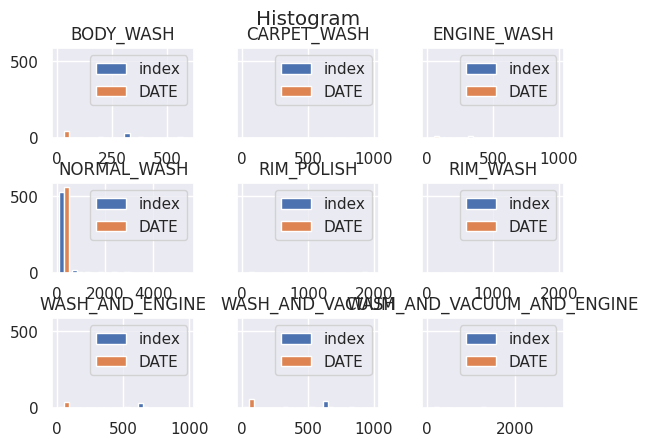

In [ ]:
plt.figure(figsize=(10,10))
data.hist(by='SERVICE', bins=10, xrot=0, sharex=False, sharey=True, legend=True, grid=True)
plt.suptitle('Histogram')
#plt.savefig('hist.jpeg', dpi=300)
plt.show()

<Figure size 1000x1000 with 0 Axes>

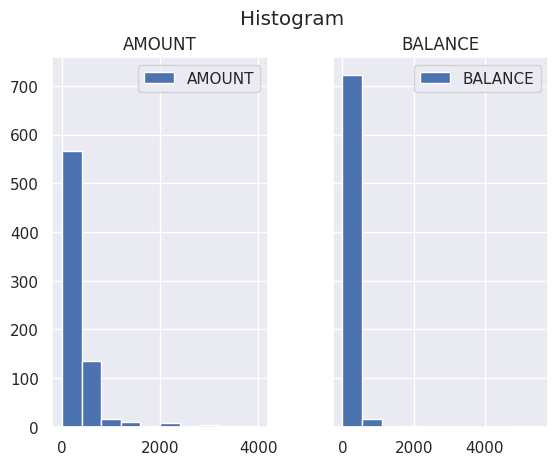

In [ ]:
plt.figure(figsize=(10,10))
data[['AMOUNT', 'BALANCE']].hist(bins=10, xrot=0, sharex=False, sharey=True, legend=True, grid=True)
plt.suptitle('Histogram')
plt.savefig('hist.jpeg', dpi=300)
plt.show()

<Figure size 1200x1200 with 0 Axes>

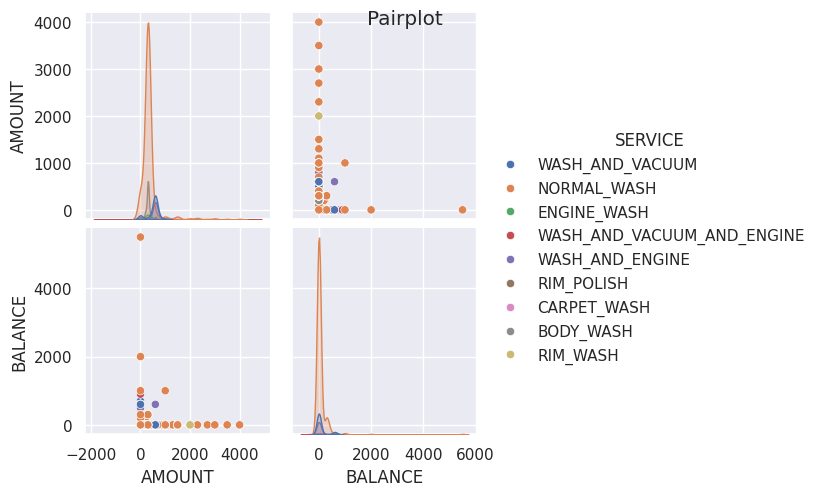

In [ ]:
plt.figure(figsize=(12,12))
sb.pairplot(data, hue='SERVICE', kind='scatter')
plt.suptitle('Pairplot')
plt.savefig('Pairplot.jpeg', dpi=300)
plt.show()

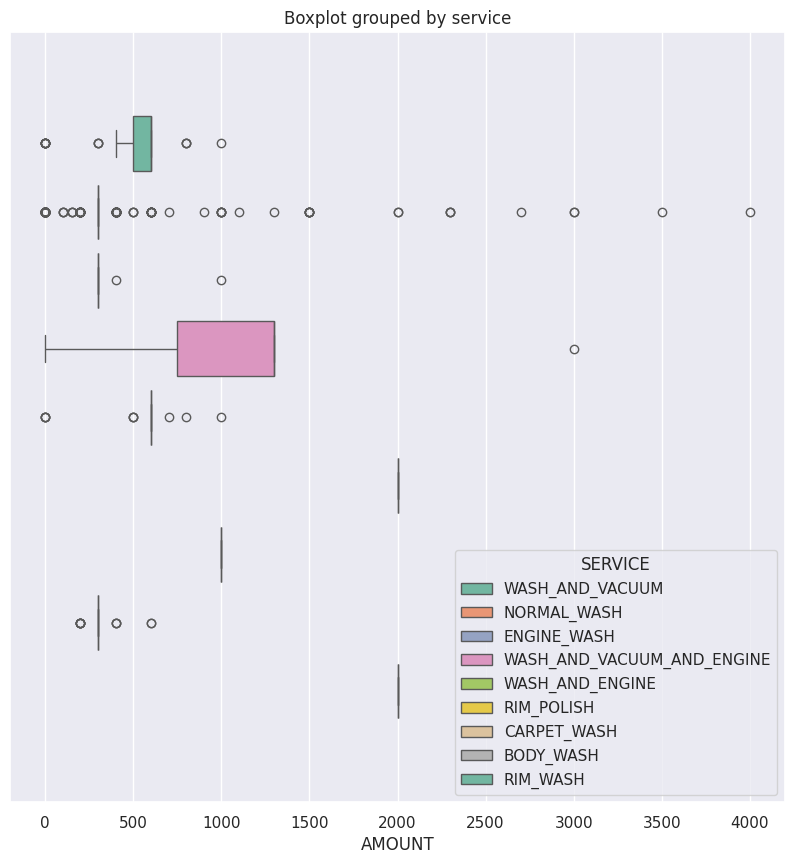

In [ ]:
plt.figure(figsize=(10,10))
sb.boxplot(data=data, palette="Set2", hue='SERVICE', x="AMOUNT", fill=True, gap=0.2)  #, notch=True)
plt.title('Boxplot grouped by service')
plt.savefig('boxplot.jpeg', dpi=300)
plt.show()

<Figure size 1000x1000 with 0 Axes>

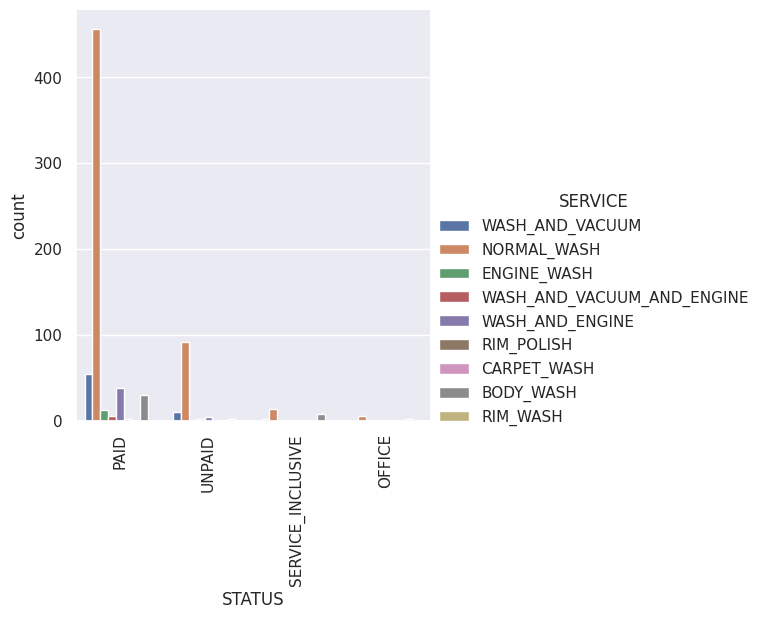

In [ ]:
plt.figure(figsize=(10,10))
count_=sb.catplot(data=data, hue="SERVICE", kind='count', x='STATUS')
count_.set_xticklabels(labels=list(data['STATUS'].unique()), rotation=90)
plt.show()

<Figure size 1000x1000 with 0 Axes>

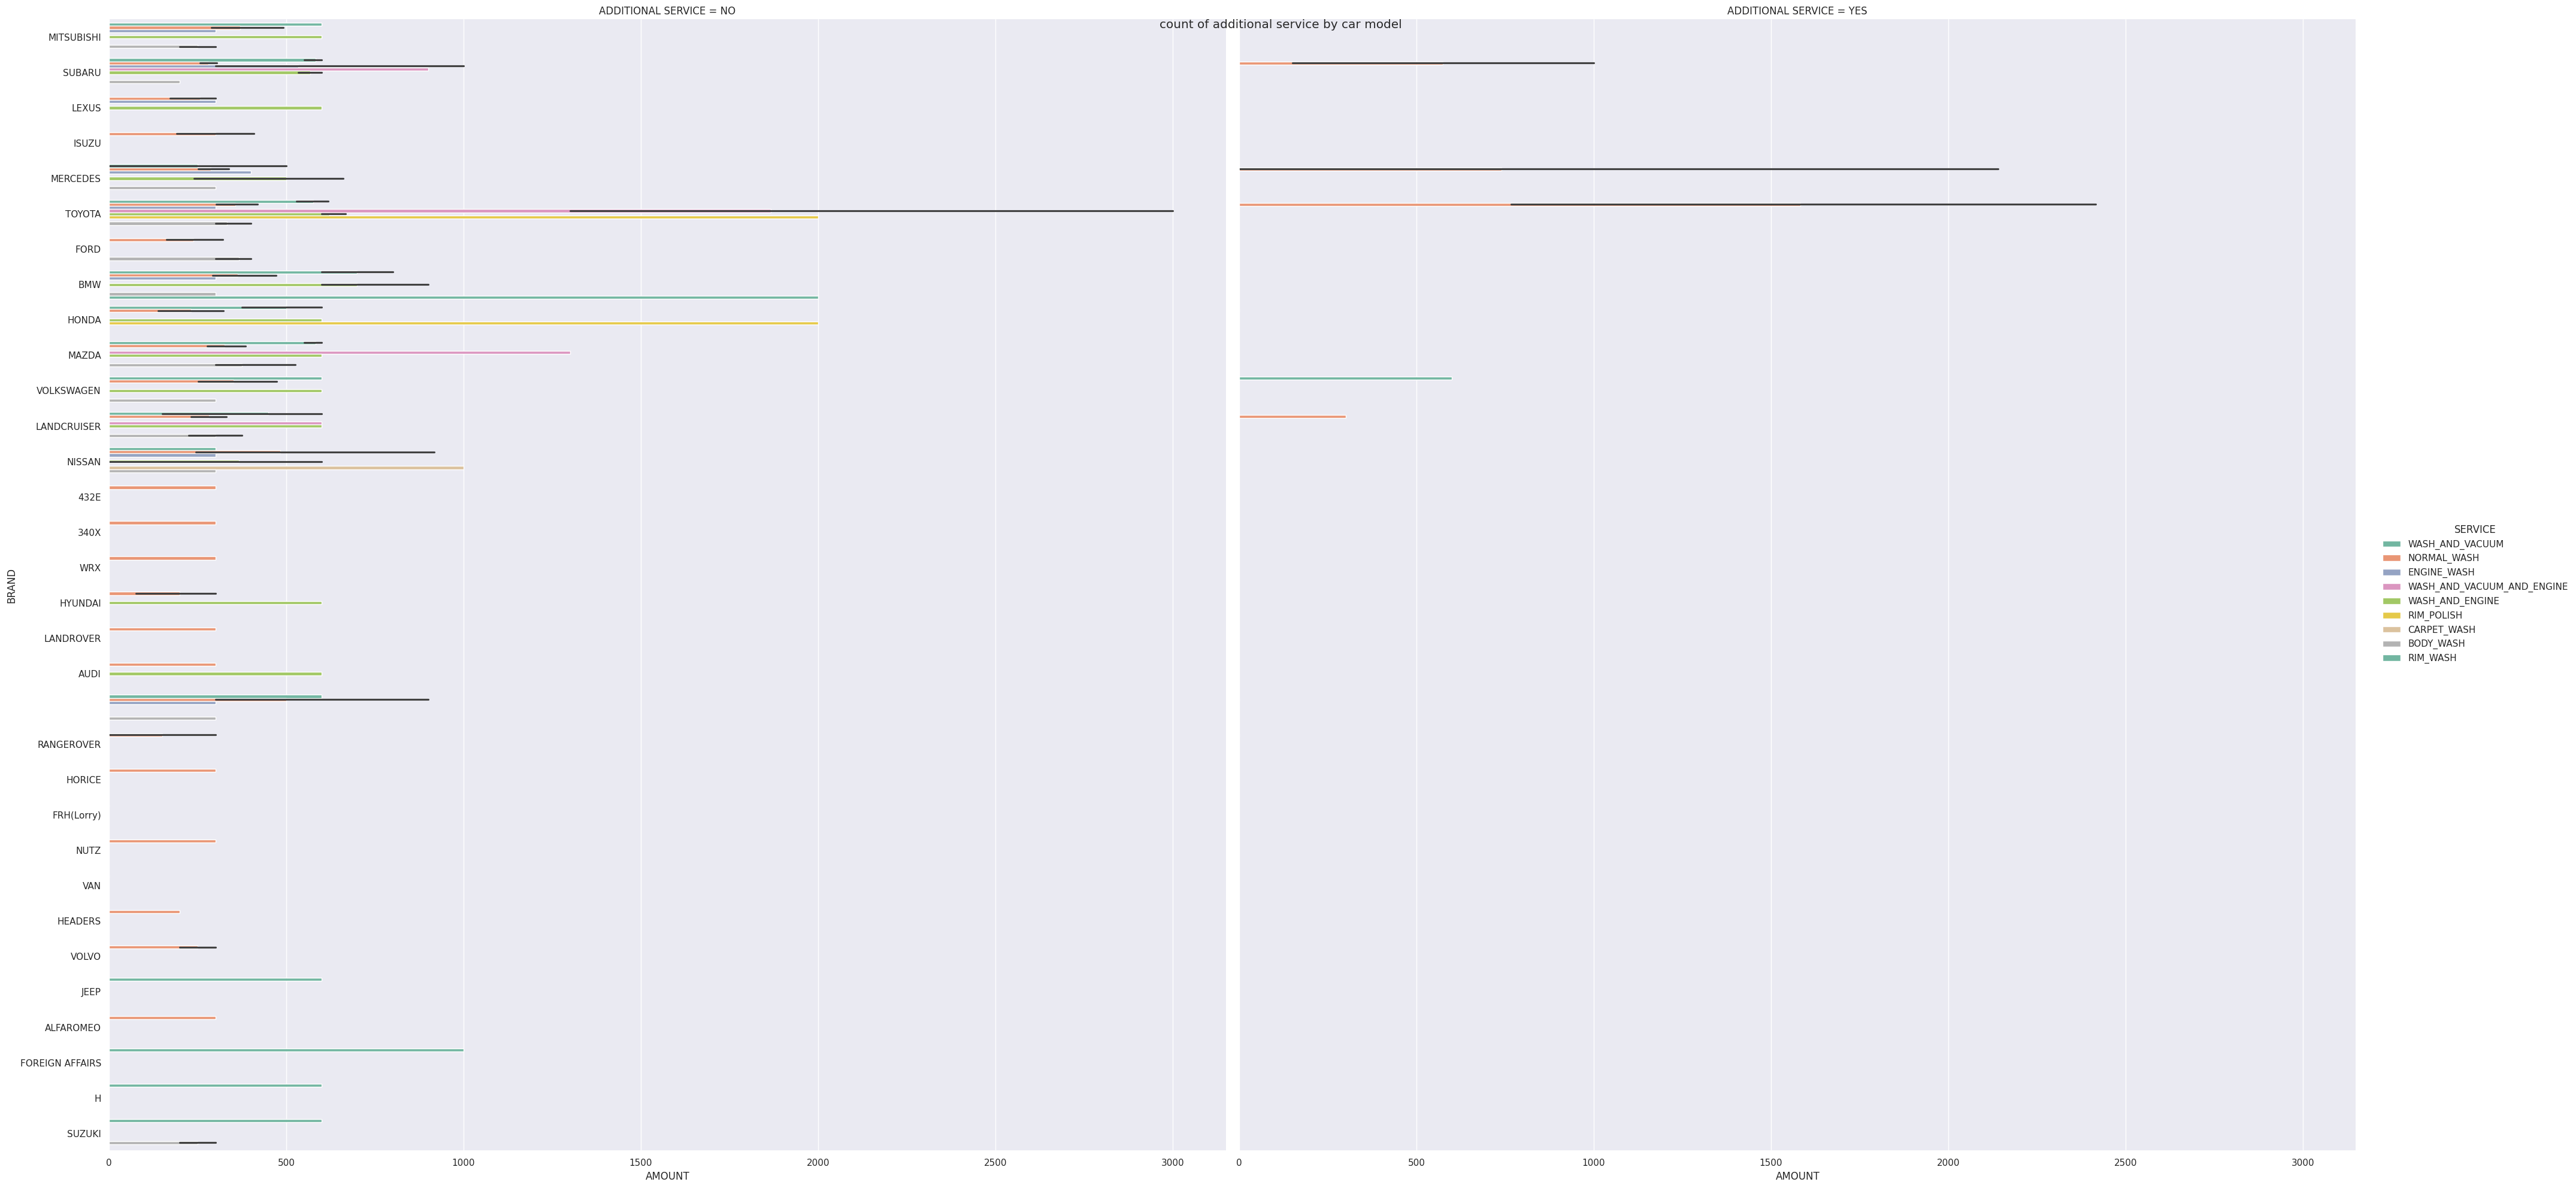

In [ ]:
plt.figure(figsize=(10,10))
_count_=sb.catplot(data=data, hue="SERVICE", col='ADDITIONAL SERVICE', x='AMOUNT', kind='bar', y='BRAND', height=20, palette='Set2')
_count_.set_yticklabels(labels=list(data['BRAND'].unique()), rotation=0)
plt.suptitle('count of additional service by car model')
plt.savefig('count.jpeg', dpi=300)
plt.show()

In [ ]:
data.head().style.background_gradient(cmap='Reds')

,index,DATE,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL,CLIENT,BRAND,MODEL
0,0,2024-09-08 00:00:00,WASH_AND_VACUUM,600.000000,MPESA,PAID,0.000000,NO,nan,nan,KCY 688Y,MITSUBISHI,COLT
1,1,2024-09-08 00:00:00,NORMAL_WASH,300.000000,MPESA,PAID,0.000000,NO,nan,nan,KAY 419,SUBARU,FORESTER
2,2,2024-09-08 00:00:00,NORMAL_WASH,300.000000,MPESA,PAID,0.000000,NO,nan,nan,KCH 178G,LEXUS,FORESTER
3,3,2024-09-08 00:00:00,NORMAL_WASH,300.000000,MPESA,PAID,0.000000,NO,nan,nan,KDL 274X,ISUZU,FORESTER
4,4,2024-09-08 00:00:00,WASH_AND_VACUUM,400.000000,CASH,PAID,0.000000,NO,nan,nan,KBA 128G,MERCEDES,FORESTER


In [ ]:
data.describe(include='all')

,index,DATE,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL,CLIENT,BRAND,MODEL
count,741,741,741,741.000000,741,741,741.000000,741,709,612,741,741,741
unique,741,NaN,9,NaN,3,4,NaN,2,13,6,417,32,82
top,0,NaN,NORMAL_WASH,NaN,MPESA,PAID,NaN,NO,MUTUA,WRITE_OFF,KCY 688F,TOYOTA,COLT
freq,1,NaN,567,NaN,715,597,NaN,721,241,557,14,187,106
mean,NaN,2025-03-19 07:34:44.210526208,NaN,382.658570,NaN,NaN,48.448043,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2024-01-11 00:00:00,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2024-09-15 00:00:00,NaN,300.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2024-10-15 00:00:00,NaN,300.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2024-11-21 00:00:00,NaN,300.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2036-08-27 00:00:00,NaN,4000.000000,NaN,NaN,5500.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [506]:
data_=data[['SERVICE', 'AMOUNT', 'BALANCE', 'ADDITIONAL SERVICE', 'BRAND', 'MODEL']]

In [507]:
col_train=list(data_.columns)
print(col_train,'\n')
test_names=list(data_['SERVICE'].unique())
print(test_names)

['SERVICE', 'AMOUNT', 'BALANCE', 'ADDITIONAL SERVICE', 'BRAND', 'MODEL'] 

['WASH_AND_VACUUM', 'NORMAL_WASH', 'ENGINE_WASH', 'WASH_AND_VACUUM_AND_ENGINE', 'WASH_AND_ENGINE', 'RIM_POLISH', 'CARPET_WASH', 'BODY_WASH', 'RIM_WASH']


In [508]:
col_train.remove('SERVICE')

In [509]:
col_train

['AMOUNT', 'BALANCE', 'ADDITIONAL SERVICE', 'BRAND', 'MODEL']

In [ ]:
from sklearn.preprocessing import * #LabelEncoder, StandardScaler, OneHotEndoder, MultiLabelBinarizer
le=LabelEncoder()
scale=StandardScaler()
one=OneHotEncoder(sparse_output=False)
multi=MultiLabelBinarizer(classes=test_names, sparse_output=False)

In [ ]:
data_['ADDITIONAL SERVICE']=le.fit_transform(data_['ADDITIONAL SERVICE'])
data_['AMOUNT']=scale.fit_transform(data_[['AMOUNT']])
data_['BALANCE']=scale.fit_transform(data_[['BALANCE']])
data_['BRAND']=one.fit_transform(data_[['BRAND']])
#data_['STATUS']=one.fit_transform(data_[['STATUS']])
data_['MODEL']=one.fit_transform(data_[['MODEL']])


In [ ]:
data_

,SERVICE,AMOUNT,BALANCE,ADDITIONAL SERVICE,BRAND,MODEL
0,WASH_AND_VACUUM,0.568208,-0.19367,0,0.0,1.0
1,NORMAL_WASH,-0.216099,-0.19367,0,0.0,1.0
2,NORMAL_WASH,-0.216099,-0.19367,0,0.0,1.0
3,NORMAL_WASH,-0.216099,-0.19367,0,0.0,1.0
4,WASH_AND_VACUUM,0.045337,-0.19367,0,0.0,1.0
...,...,...,...,...,...,...
736,NORMAL_WASH,-0.216099,-0.19367,0,0.0,1.0
737,NORMAL_WASH,-0.216099,-0.19367,0,0.0,1.0
738,NORMAL_WASH,-0.216099,-0.19367,0,0.0,1.0
739,NORMAL_WASH,-0.216099,-0.19367,0,0.0,1.0


In [ ]:
data_['SERVICE']=one.fit_transform(data_[['SERVICE']])
data_['SERVICE']

,SERVICE
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
736,0.0
737,0.0
738,0.0
739,0.0


In [ ]:
x=data_.drop('SERVICE', axis=1)
x

,AMOUNT,BALANCE,ADDITIONAL SERVICE,BRAND,MODEL
0,0.568208,-0.19367,0,0.0,1.0
1,-0.216099,-0.19367,0,0.0,1.0
2,-0.216099,-0.19367,0,0.0,1.0
3,-0.216099,-0.19367,0,0.0,1.0
4,0.045337,-0.19367,0,0.0,1.0
...,...,...,...,...,...
736,-0.216099,-0.19367,0,0.0,1.0
737,-0.216099,-0.19367,0,0.0,1.0
738,-0.216099,-0.19367,0,0.0,1.0
739,-0.216099,-0.19367,0,0.0,1.0


In [ ]:
y=data_['SERVICE']
y

,SERVICE
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
736,0.0
737,0.0
738,0.0
739,0.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [ ]:
x_train

,AMOUNT,BALANCE,ADDITIONAL SERVICE,BRAND,MODEL
110,-0.216099,-0.19367,0,0.0,1.0
78,-0.216099,-0.19367,0,0.0,1.0
362,-0.738971,-0.19367,0,0.0,1.0
562,-0.216099,-0.19367,0,0.0,1.0
692,-0.216099,-0.19367,0,0.0,1.0
...,...,...,...,...,...
567,0.045337,-0.19367,0,0.0,1.0
646,-0.216099,-0.19367,0,0.0,1.0
28,0.045337,-0.19367,0,0.0,1.0
621,-0.216099,-0.19367,0,0.0,1.0


In [ ]:
x_test

,AMOUNT,BALANCE,ADDITIONAL SERVICE,BRAND,MODEL
113,0.568208,-0.19367,0,0.0,1.0
13,-0.216099,-0.19367,0,0.0,1.0
30,0.306773,-0.19367,0,0.0,1.0
457,-0.216099,-0.19367,0,0.0,1.0
538,0.306773,-0.19367,0,0.0,1.0
...,...,...,...,...,...
218,-0.608253,-0.19367,0,0.0,1.0
155,-0.216099,-0.19367,0,0.0,1.0
699,0.568208,-0.19367,0,0.0,1.0
401,-0.216099,-0.19367,0,0.0,1.0


In [ ]:
y_train

,SERVICE
110,0.0
78,0.0
362,0.0
562,1.0
692,0.0
...,...
567,1.0
646,0.0
28,0.0
621,0.0


In [ ]:
y_test

,SERVICE
113,0.0
13,0.0
30,0.0
457,0.0
538,0.0
...,...
218,0.0
155,0.0
699,0.0
401,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
random.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
random_prediction=random.predict(x_test)
random_prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from sklearn.metrics import * #accuracy_score, classification_report
print('The accuracy score is {}.'.format(accuracy_score(y_test, random_prediction)))

The accuracy score is 0.9261744966442953.


In [ ]:
print(classification_report(y_test, random_prediction))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       138
         1.0       0.00      0.00      0.00        11

    accuracy                           0.93       149
   macro avg       0.46      0.50      0.48       149
weighted avg       0.86      0.93      0.89       149



[[138   0]
 [ 11   0]]


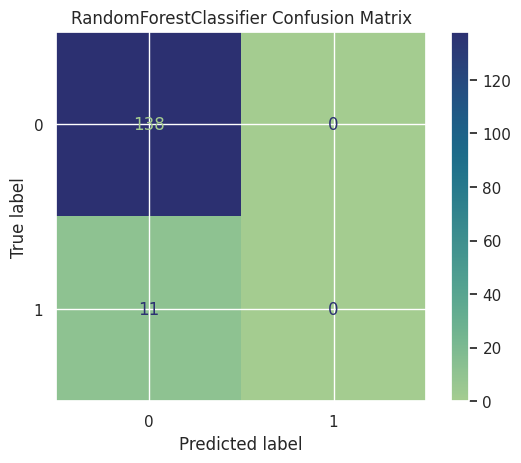

In [ ]:
# Creating the confusion matrix for the RandomForestClassifier
con_mat=confusion_matrix(y_test, random_prediction)
print(con_mat)
# Creating the confusion matrix visual display
vis_con_mat=ConfusionMatrixDisplay(confusion_matrix=con_mat)
vis_con_mat.plot(cmap='crest')
plt.title('RandomForestClassifier Confusion Matrix')
# Saving the figure
plt.savefig('RandomForestClassifier Confusion Matrix.jpg', dpi=500)
plt.show()

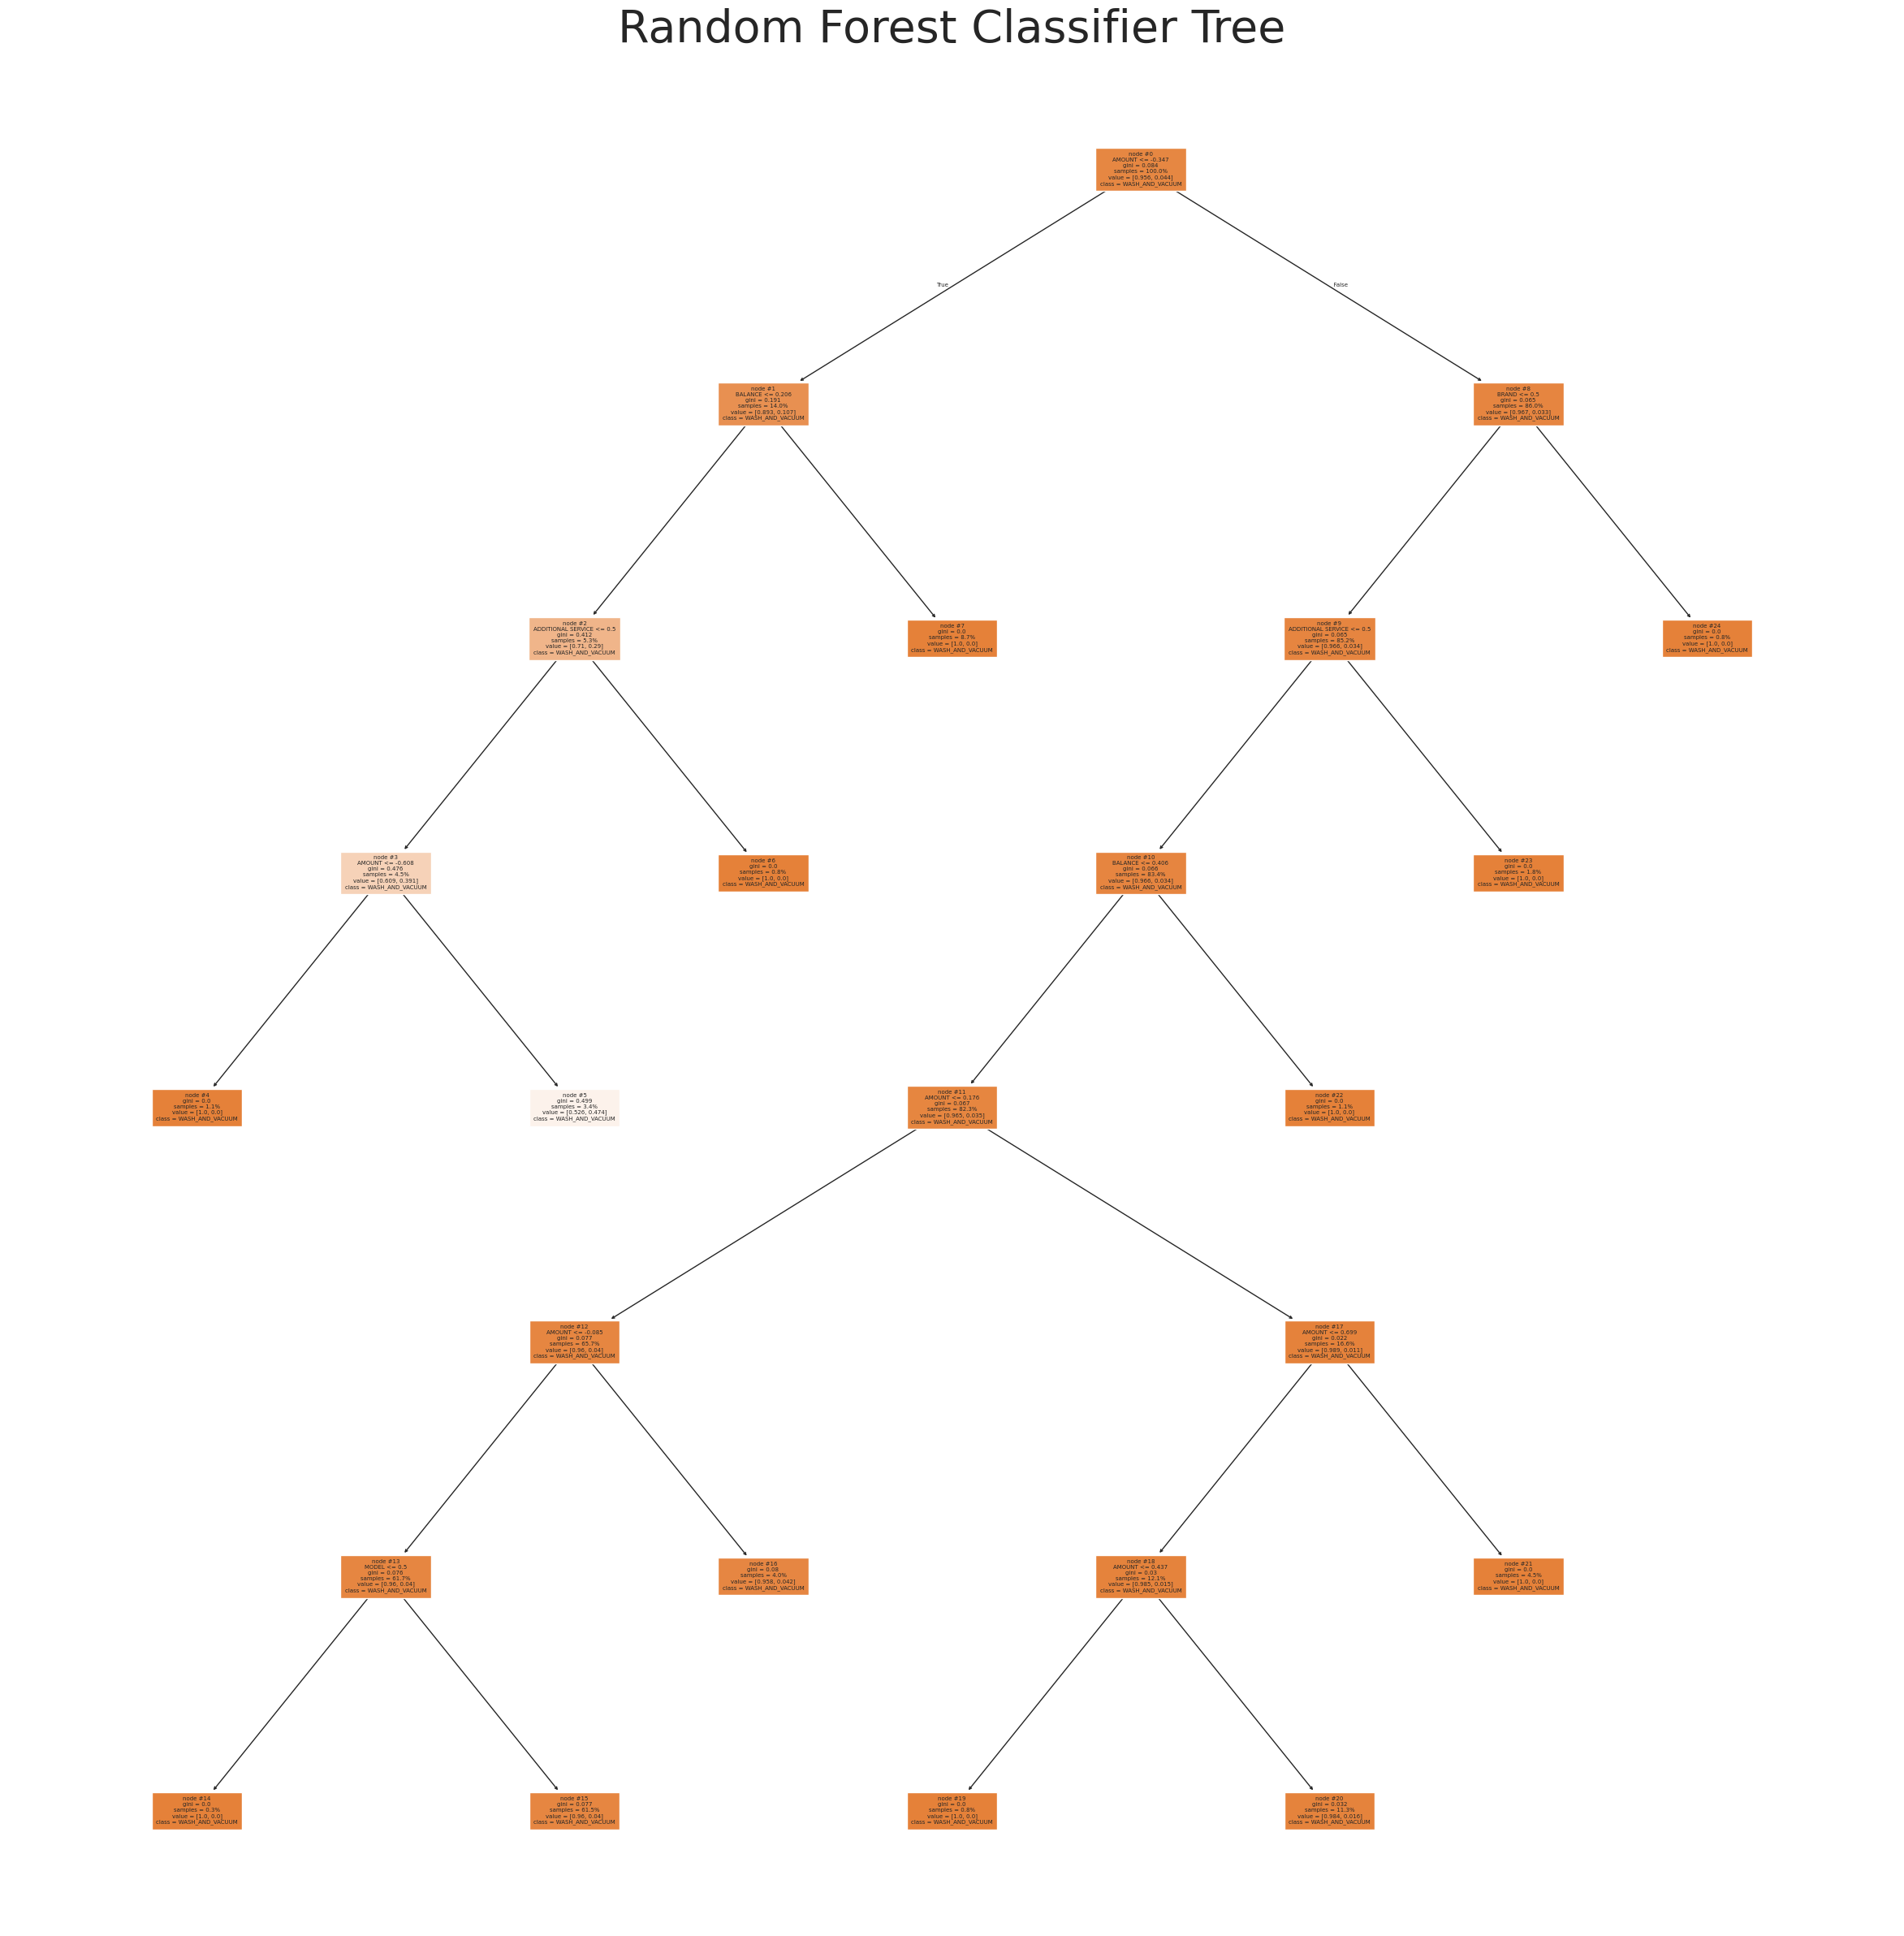

In [510]:
# Importing plot_tree
from sklearn.tree import plot_tree

# Plotting the Random Forest Classifier tree
plt.figure(figsize=(30,30))
plot_tree(random.estimators_[0], feature_names=col_train, class_names=test_names, filled=True, fontsize=5, node_ids=True, proportion=True)
plt.title('Random Forest Classifier Tree', fontsize=40)
# Saving the image
plt.savefig('Random Forest Classifier Tree.jpg', dpi=700)
plt.show()

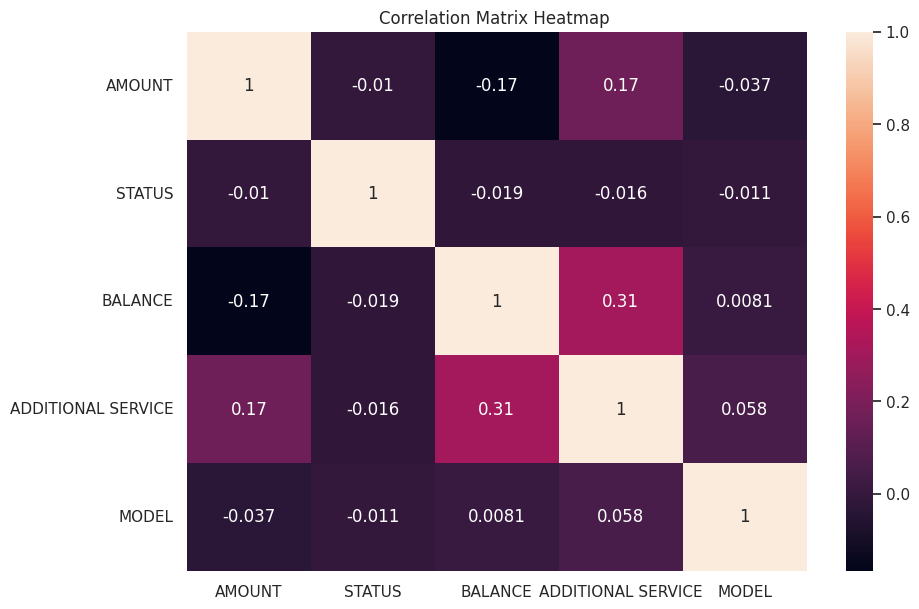

In [511]:
correlation_matrix = data.corr(numeric_only=True)
# setting the size of the plot
fig=plt.figure(figsize=(10,7))
# Plotting the correlation matrix and displaying it
sb.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap ')
plt.savefig('heatmap.jpg', dpi=500)
plt.show()

In [512]:
col_train

['AMOUNT', 'BALANCE', 'ADDITIONAL SERVICE', 'BRAND', 'MODEL']

              Feature  Gini Importance
4               MODEL         0.013609
2  ADDITIONAL SERVICE         0.026812
1             BALANCE         0.079075
3               BRAND         0.241904
0              AMOUNT         0.638600


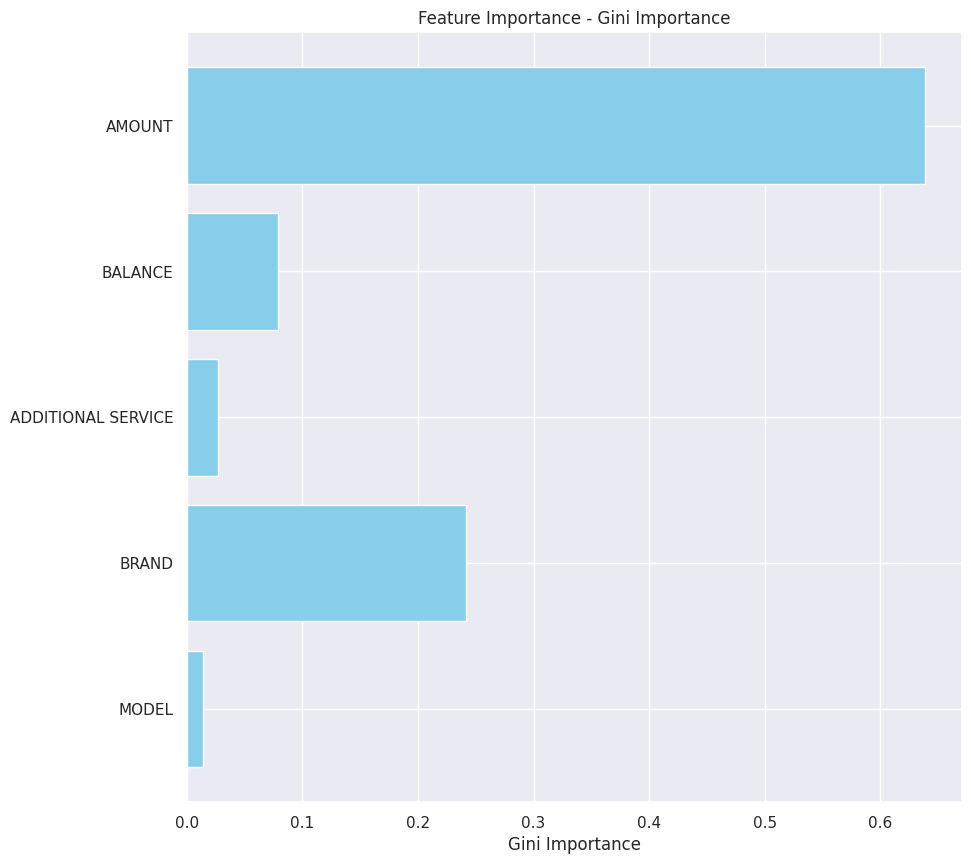

In [513]:
# Feature importance plots
Feature_imp=random.feature_importances_
feature_imp_df=pd.DataFrame({'Feature':col_train, 'Gini Importance':Feature_imp}).sort_values('Gini Importance', ascending=True)
print(feature_imp_df)

plt.figure(figsize=(10,10))
plt.barh(col_train, Feature_imp, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()
#plt.savefig('Feature Importance.jpg', dpi=500)
plt.show()